In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
#check for duplicates :
df.duplicated().sum()

0

# Check for missing values

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
#we will drop columns _c39 as it is empty 
df.drop('_c39',axis=1 ,inplace=True)

In [6]:
for i in df.columns :
    print(i,': \n')
    print(df[i].value_counts())
    print('\n')

months_as_customer : 

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


age : 

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


policy_number : 

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


policy_bind_date : 

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997 

We notice there is an abnormal value '?' is some columns which indicates nothing so we will detect columns and replace it

In [7]:
for i in ['',' ','-','NA','NAN','?']:
    print(df.isin([i]).sum().any())

False
False
False
False
False
True


There are columns with values '?' s we will detect them

In [8]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

collision_type , property_damage , olice_report_available are categorical data type so we will use mode to fill nan values

In [9]:
df['collision_type'] = df['collision_type'].replace({'?':np.nan})
df['property_damage'] = df['property_damage'].replace({'?':np.nan})
df['police_report_available'] = df['police_report_available'].replace({'?':np.nan})

In [10]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [11]:
#now recheck null values :
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

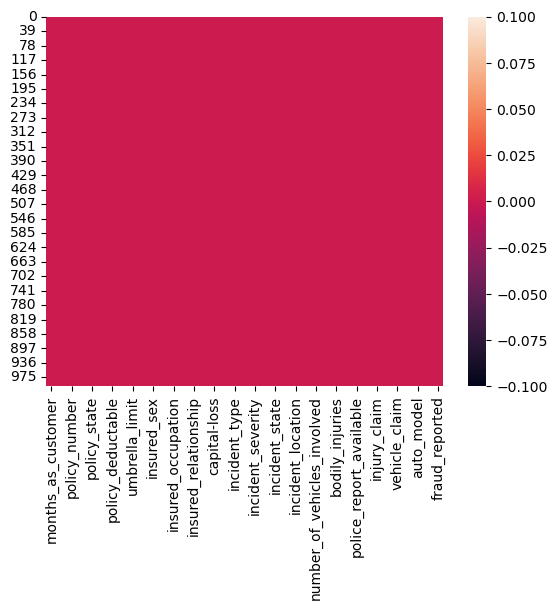

In [12]:
sns.heatmap(df.isnull())
plt.show()

we have removed null values in all dataset

# Statistical and Analytical data

In [13]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [14]:
#let us delete unnecessary columns
df.drop(['policy_number','incident_location','insured_zip'],axis=1 , inplace=True)

In [15]:
df.shape

(1000, 36)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

policy_bind_date , incident_state are object data type columns so we will convert them to datetime type to extract indications from them

In [17]:
import datetime

In [18]:
#convertin date columns to datetime format :
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [19]:
# let us check :
df['policy_bind_date'].dtypes
df['incident_date'].dtypes

dtype('<M8[ns]')

In [20]:
#now we extract more data from both columns to use it in classification :
df['plicy_blind_day'] = df['policy_bind_date'].dt.day
df['plicy_blind_month'] = df['policy_bind_date'].dt.month
df['plicy_blind_year'] = df['policy_bind_date'].dt.year

df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [21]:
df.drop(['policy_bind_date','incident_date'],axis=1 , inplace=True)

In [22]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [23]:
# column policy_csl is unnecessary so we drop it:
df.drop('policy_csl',axis=1 , inplace=True)

In [24]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_make,auto_model,auto_year,fraud_reported,plicy_blind_day,plicy_blind_month,plicy_blind_year,incident_day,incident_month,incident_year
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,Volkswagen,Passat,2015,N,1,5,2014,24,1,2015
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,Audi,A5,1998,N,18,11,2011,26,2,2015


In [25]:
df['incident_year'].unique()

array([2015], dtype=int64)

In [26]:
# from table we see that column incident_year has one unique value so we will drop it
df.drop('incident_year',axis=1 , inplace=True)

In [27]:
# from columns auto_year and while all incident years are in 2015 so we can conclude the age of vechile:
df['auto_age'] = 2015 - df['auto_year']

In [28]:
# from table we notice that 'total_claim_amount' is the sum of all claim data so we will drp them as no need for them
print(df['total_claim_amount'].iloc[20])
print(df['injury_claim'].iloc[20] + df['property_claim'].iloc[20] +df['vehicle_claim'].iloc[20] )

47160
47160


In [29]:
df.drop(['injury_claim','property_claim','vehicle_claim'],axis=1 , inplace=True)

In [30]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_make,auto_model,auto_year,fraud_reported,plicy_blind_day,plicy_blind_month,plicy_blind_year,incident_day,incident_month,auto_age
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,Saab,92x,2004,Y,17,10,2014,25,1,11
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,Mercedes,E400,2007,Y,27,6,2006,21,1,8
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,Dodge,RAM,2007,N,9,6,2000,22,2,8
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,1
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,Accura,RSX,2009,N,6,6,2014,17,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,Honda,Accord,2006,N,16,7,1991,22,2,9
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,Volkswagen,Passat,2015,N,1,5,2014,24,1,0
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,Suburu,Impreza,1996,N,17,2,2003,23,1,19
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,Audi,A5,1998,N,18,11,2011,26,2,17


In [31]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,plicy_blind_day,plicy_blind_month,plicy_blind_year,incident_day,incident_month,auto_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,2005.103000,15.448000,6.559000,2001.604000,13.08400,3.407000,9.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,6.015861,8.850176,3.391758,7.360391,10.44318,3.276291,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,1995.000000,1.000000,1.000000,1990.000000,1.00000,1.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,2000.000000,8.000000,4.000000,1995.000000,2.00000,1.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,2005.000000,16.000000,7.000000,2002.000000,15.00000,2.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,2010.000000,23.000000,9.000000,2008.000000,22.00000,5.000000,15.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,2015.000000,31.000000,12.000000,2015.000000,31.00000,12.000000,20.000000


we suumerize that :
- all columns have the same shape
- all columns with continuous data have outliers
- most of columns with cntinuous data are skewed

In [32]:
#now let us distinguish categorical and numerical columns :
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)

In [33]:
print('no of categorical columns = ',len(cat))
print('categorical columns are :\n',cat)
print('-'*50)
print('no of numerical columns = ',len(num))
print('numerical columns are :\n',num)

no of categorical columns =  17
categorical columns are :
 ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
--------------------------------------------------
no of numerical columns =  19
numerical columns are :
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'auto_year', 'plicy_blind_day', 'plicy_blind_month', 'plicy_blind_year', 'incident_day', 'incident_month', 'auto_age']


# Visualizing Data

In [34]:
print('minimum age of customer ',df['age'].min())
print('maximum age of customer ',df['age'].max())

minimum age of customer  19
maximum age of customer  64


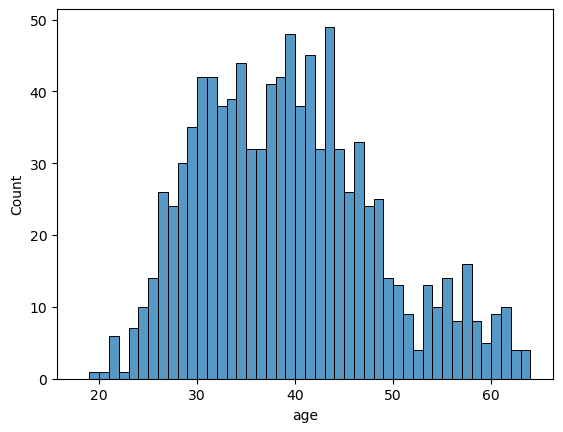

In [35]:
sns.histplot(df['age'] , bins = np.arange(18,65,1))
plt.show()

- most of customers are at age 45 while tenagers are the least

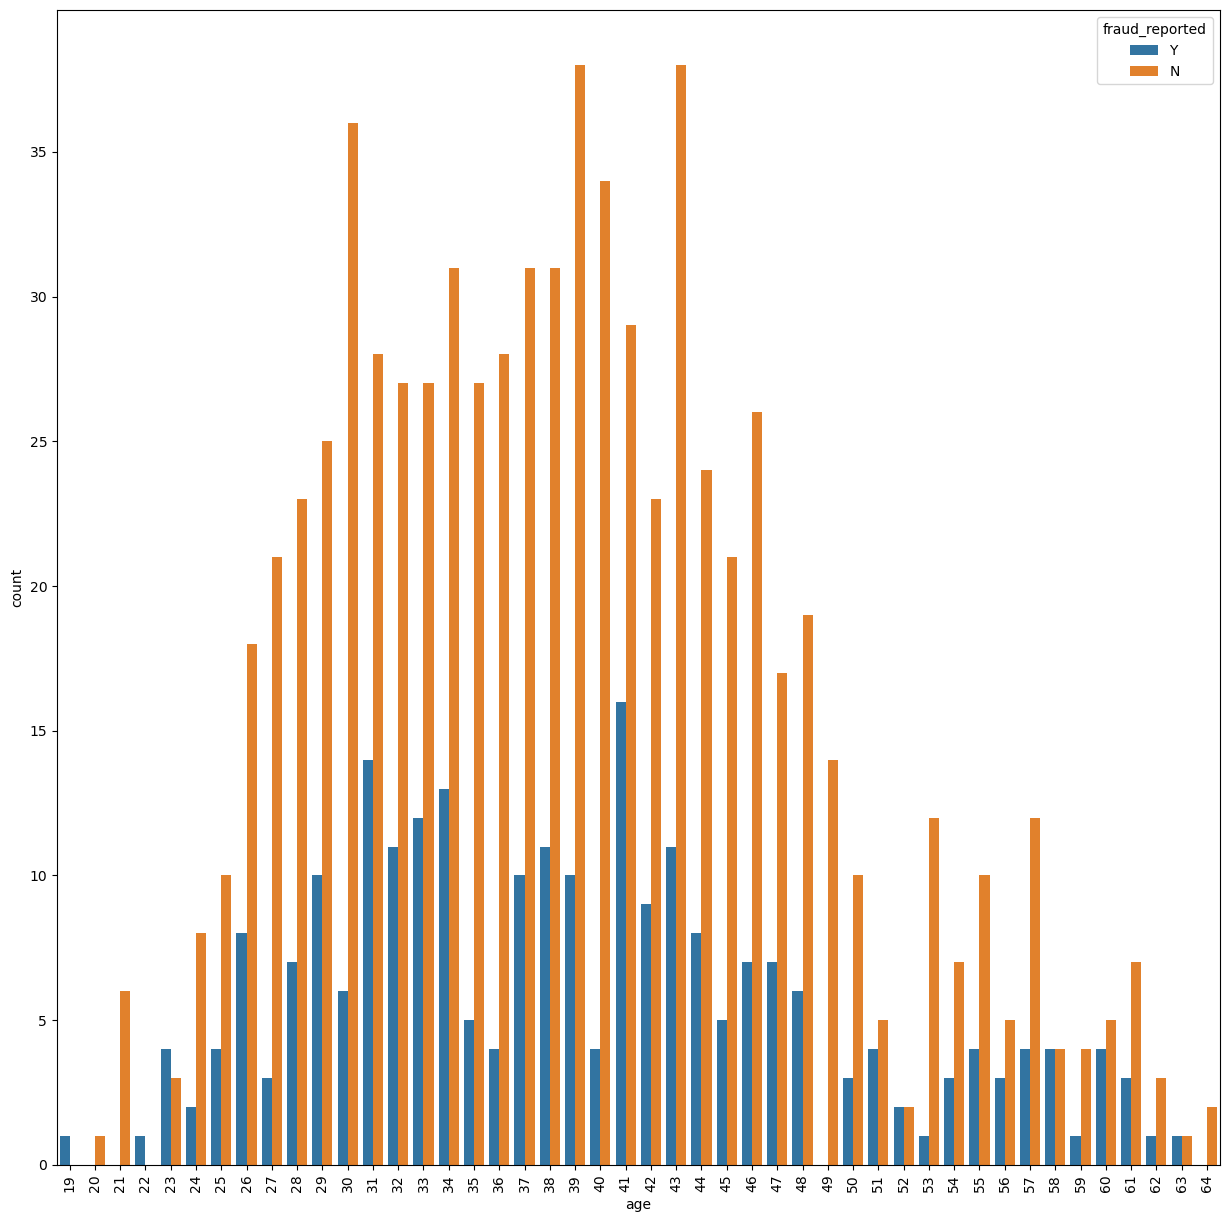

In [36]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['age'] , hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- most of customers at age 41 has reported for fraud cases
- fraud cases are least between teenagers at age 22 and lower
- fraud cases are least at ages over 60

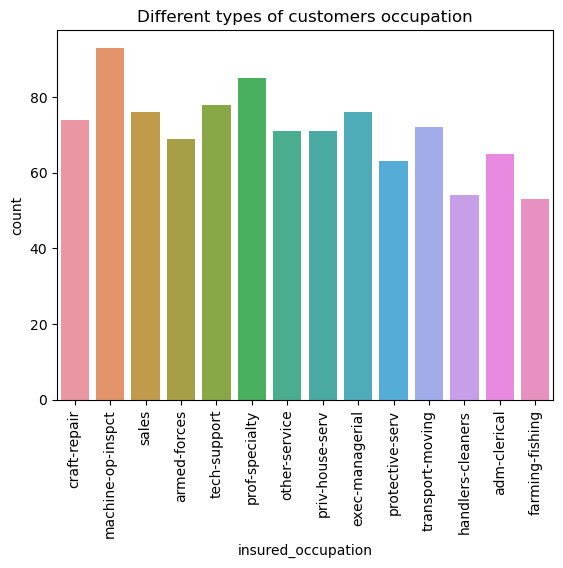

In [37]:
sns.countplot(x = df['insured_occupation'])
plt.title('Different types of customers occupation')
plt.xticks(rotation=90)
plt.show()

- most of customers are working as machine-op-inspect
- farming-fishing are the least customers

Different Jobs of customers


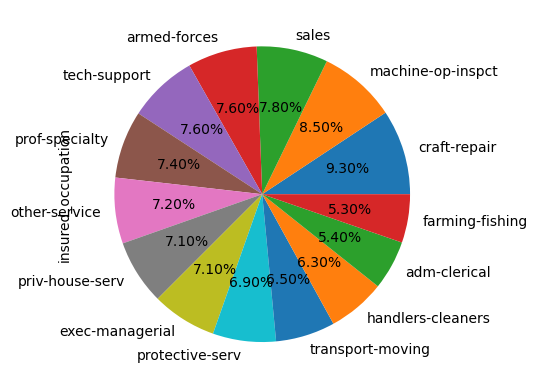

In [38]:
df['insured_occupation'].value_counts().plot(kind='pie',labels=df['insured_occupation'].unique() ,autopct ='%.2f%%')
print('Different Jobs of customers')
plt.show()

- 8.50 % of customers are machine-op-inspct and they they are the majority
- farming fishing are the least with 5.30 %

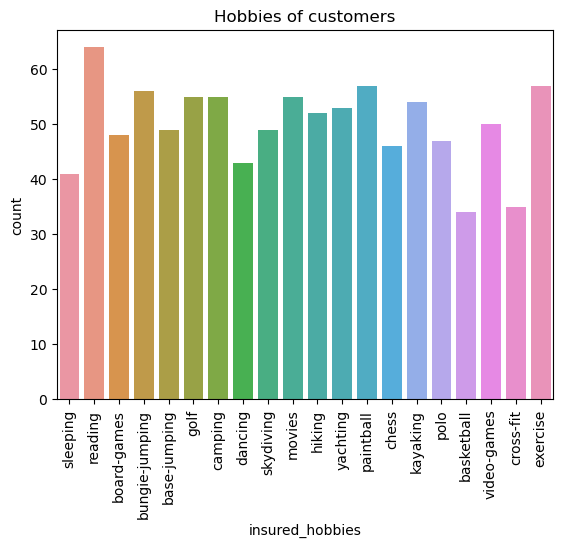

In [39]:
sns.countplot(x = df['insured_hobbies'])
plt.title('Hobbies of customers')
plt.xticks(rotation=90)
plt.show()

- most f customers like reading
- the least lije basketball

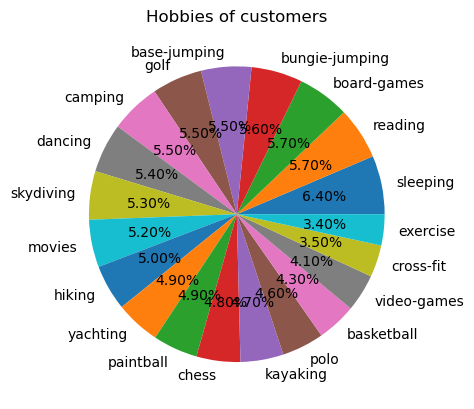

In [40]:
plt.pie(x=df['insured_hobbies'].value_counts() , labels=df['insured_hobbies'].unique(),autopct='%.2f%%')
plt.title('Hobbies of customers')
plt.show()

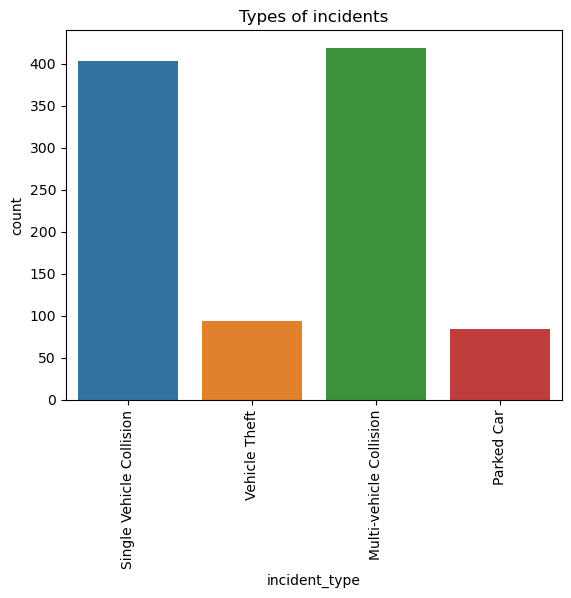

In [41]:
sns.countplot(x = df['incident_type'])
plt.title('Types of incidents')
plt.xticks(rotation=90)
plt.show()

- Multi-vechile collision is the most inscident types
- Parked car are the least types of inscidents

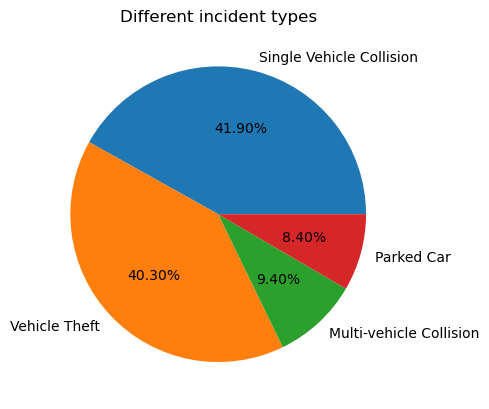

In [42]:
plt.pie(x=df['incident_type'].value_counts() , labels=df['incident_type'].unique(),autopct='%.2f%%')
plt.title('Different incident types')
plt.show()

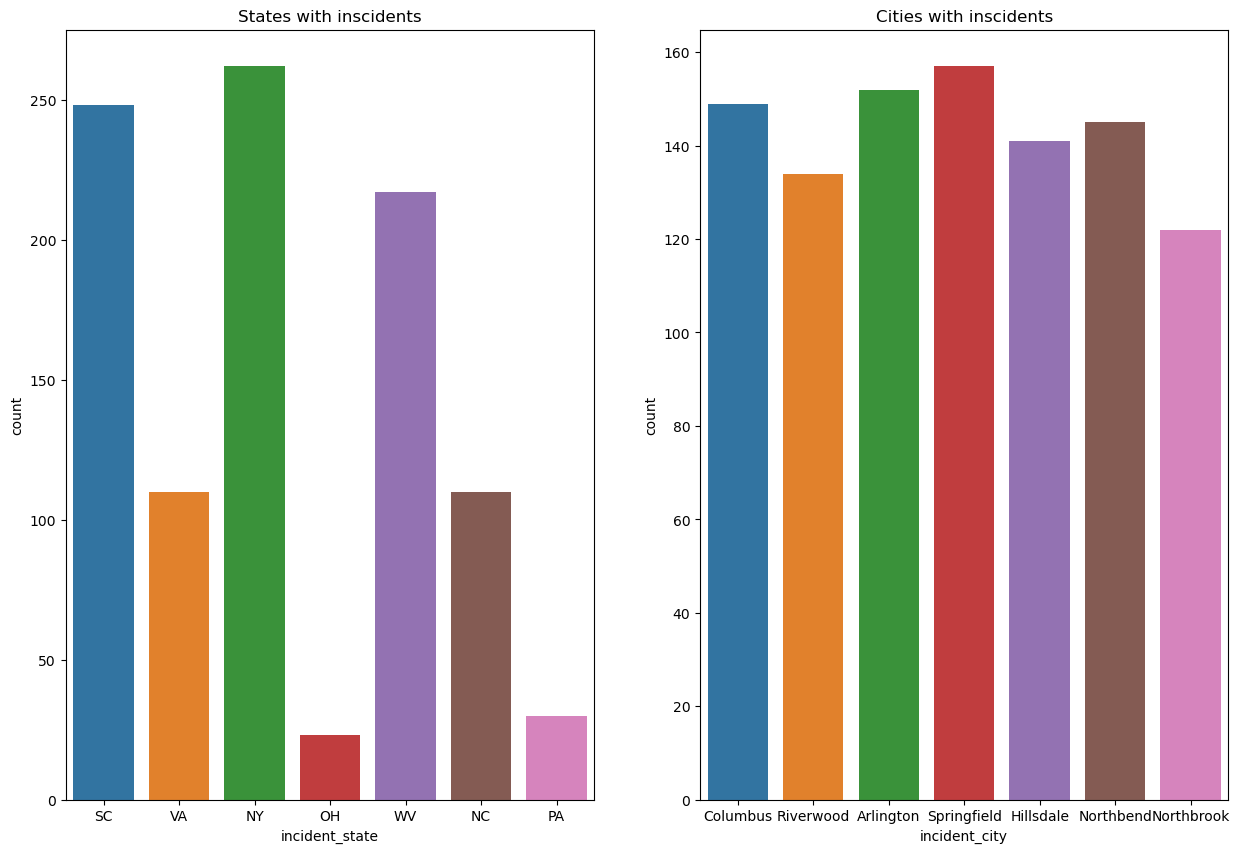

In [43]:
fig , axx = plt.subplots(1,2,figsize=(15,10))
sns.countplot(x = df['incident_state'] , ax=axx[0])
sns.countplot(x = df['incident_city'] , ax=axx[1])
axx[0].set_title('States with inscidents')
axx[1].set_title('Cities with inscidents')
plt.show()

- NewYork is the highest rated inscidents state
- springfield is the highest rated inscidents city

In [44]:
print(cat)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


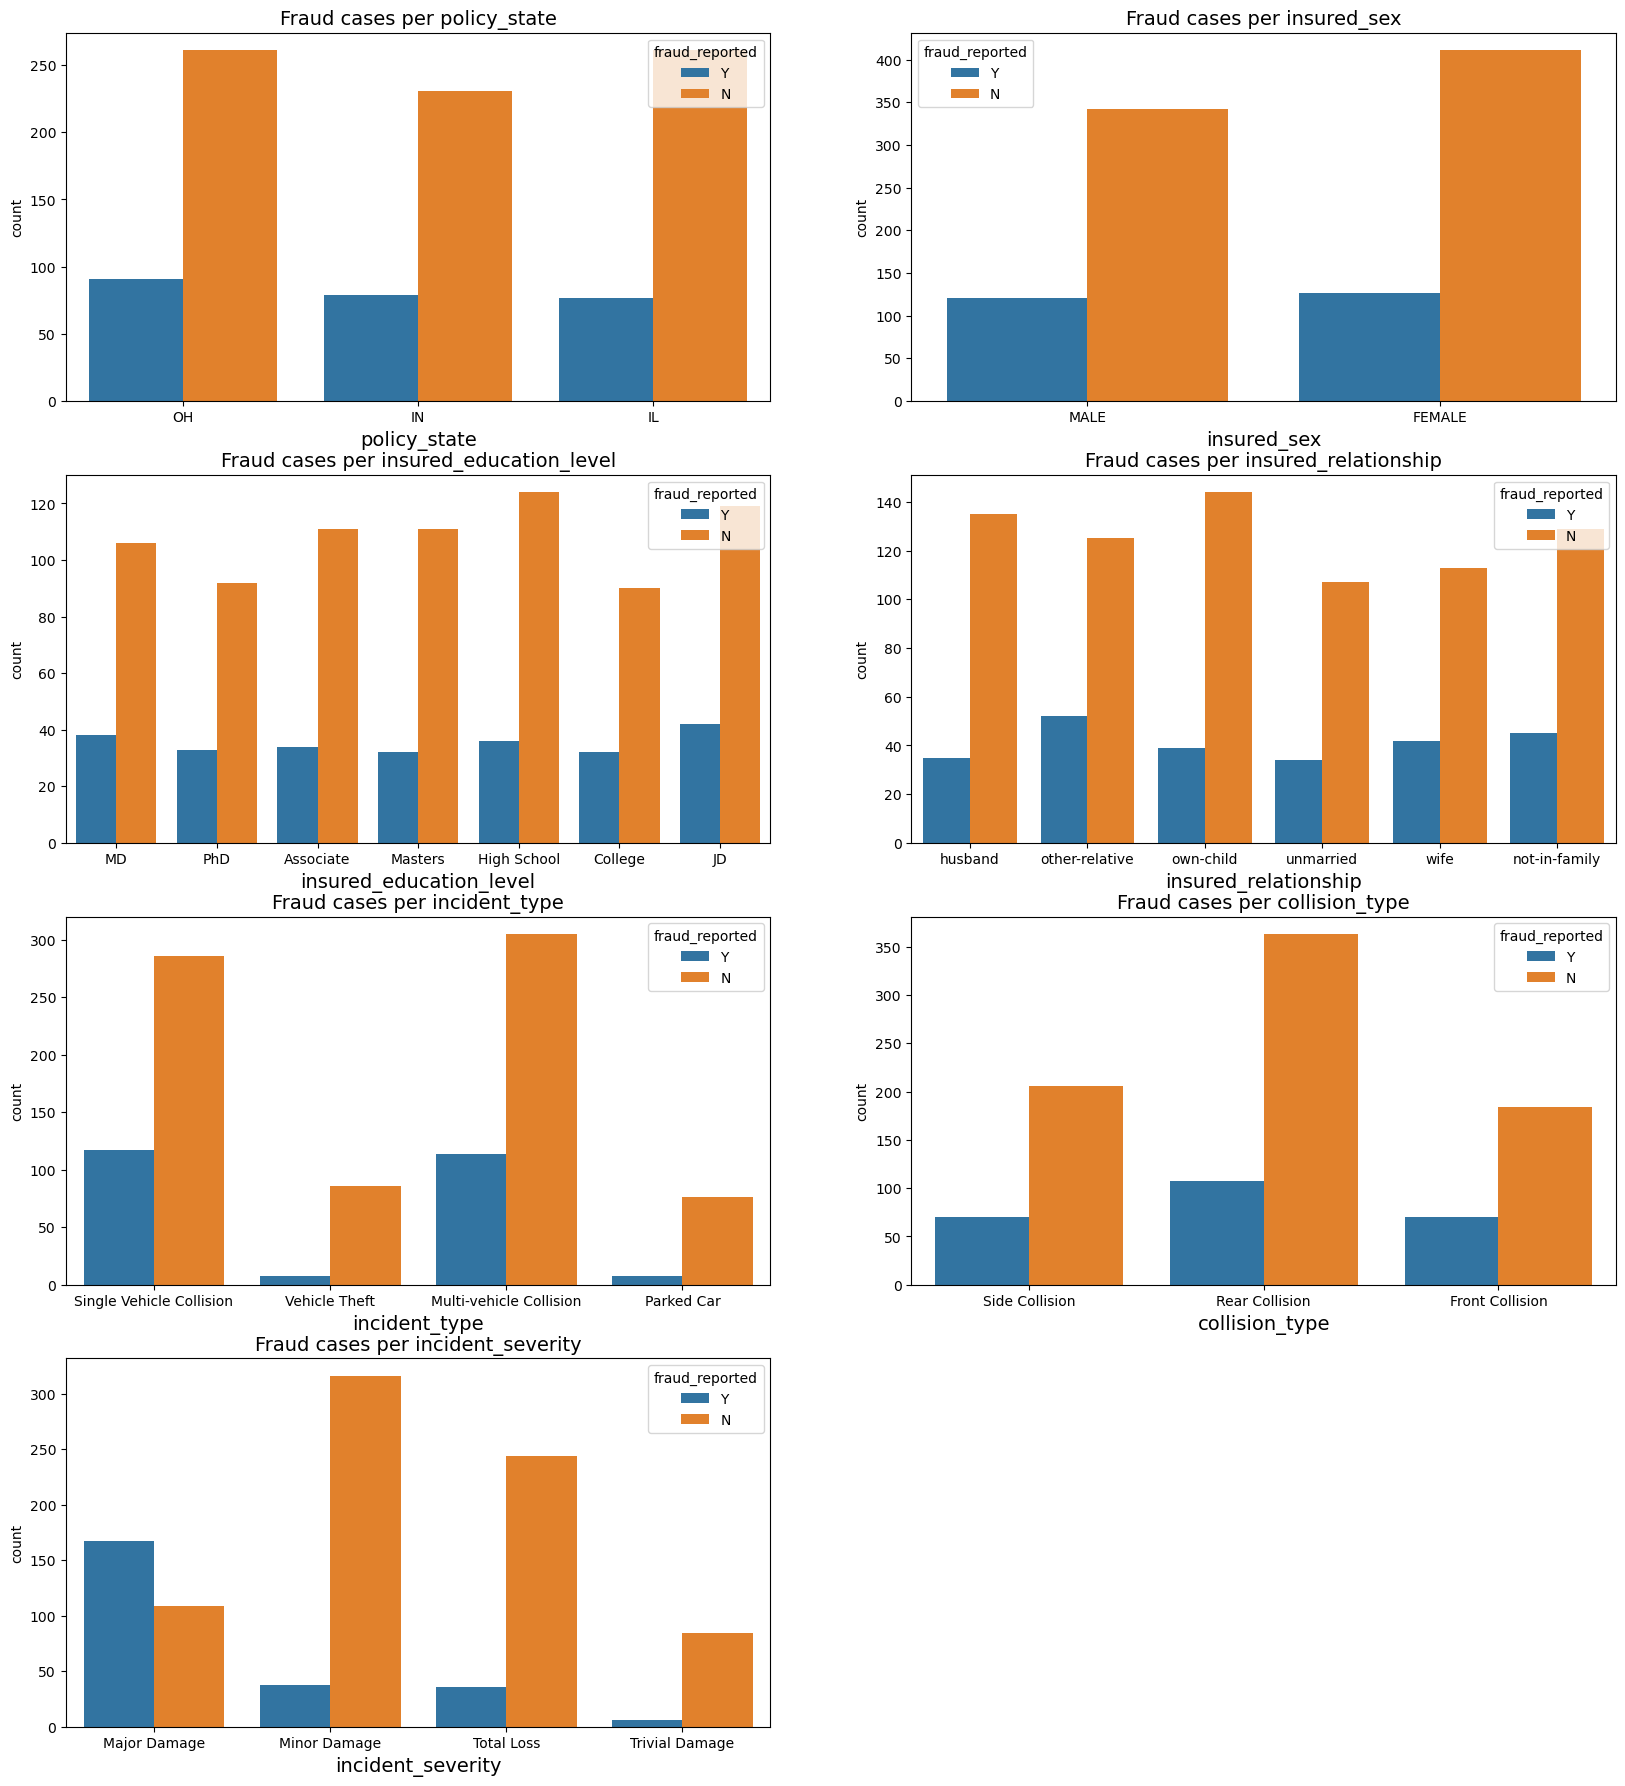

In [45]:
plt.figure(figsize=(20,22))
plot = 1
cols= ['policy_state', 'insured_sex', 'insured_education_level','insured_relationship','incident_type','collision_type','incident_severity']
for i in cols :
    if plot <= 7 :
        ax= plt.subplot(4,2,plot)
        sns.countplot(x=df[i] , hue=df['fraud_reported'])
        plt.title('Fraud cases per '+ i , fontsize=14)
        plt.xlabel(i, fontsize=14)
    plot  +=1
plt.show()    

we summerize that :
- most of female customers reported for fraud cases
- most of customers did not report for fraud cases
- the majority of policy states did not report for fraud cases while state OH is the most reported state for fraud cases
- most of customers who reported for fraud cases are having JD education and customers with different high education level made fraud reports
- wives made fraud reports more than husbands while non relatives who are in the location make claims more than relatives
- Rear collision cases have the most fraud cases
- Multi-vehicle collision have made the most fraud reports than any other types
- Major Damage cases made fraud claims more than any other cases

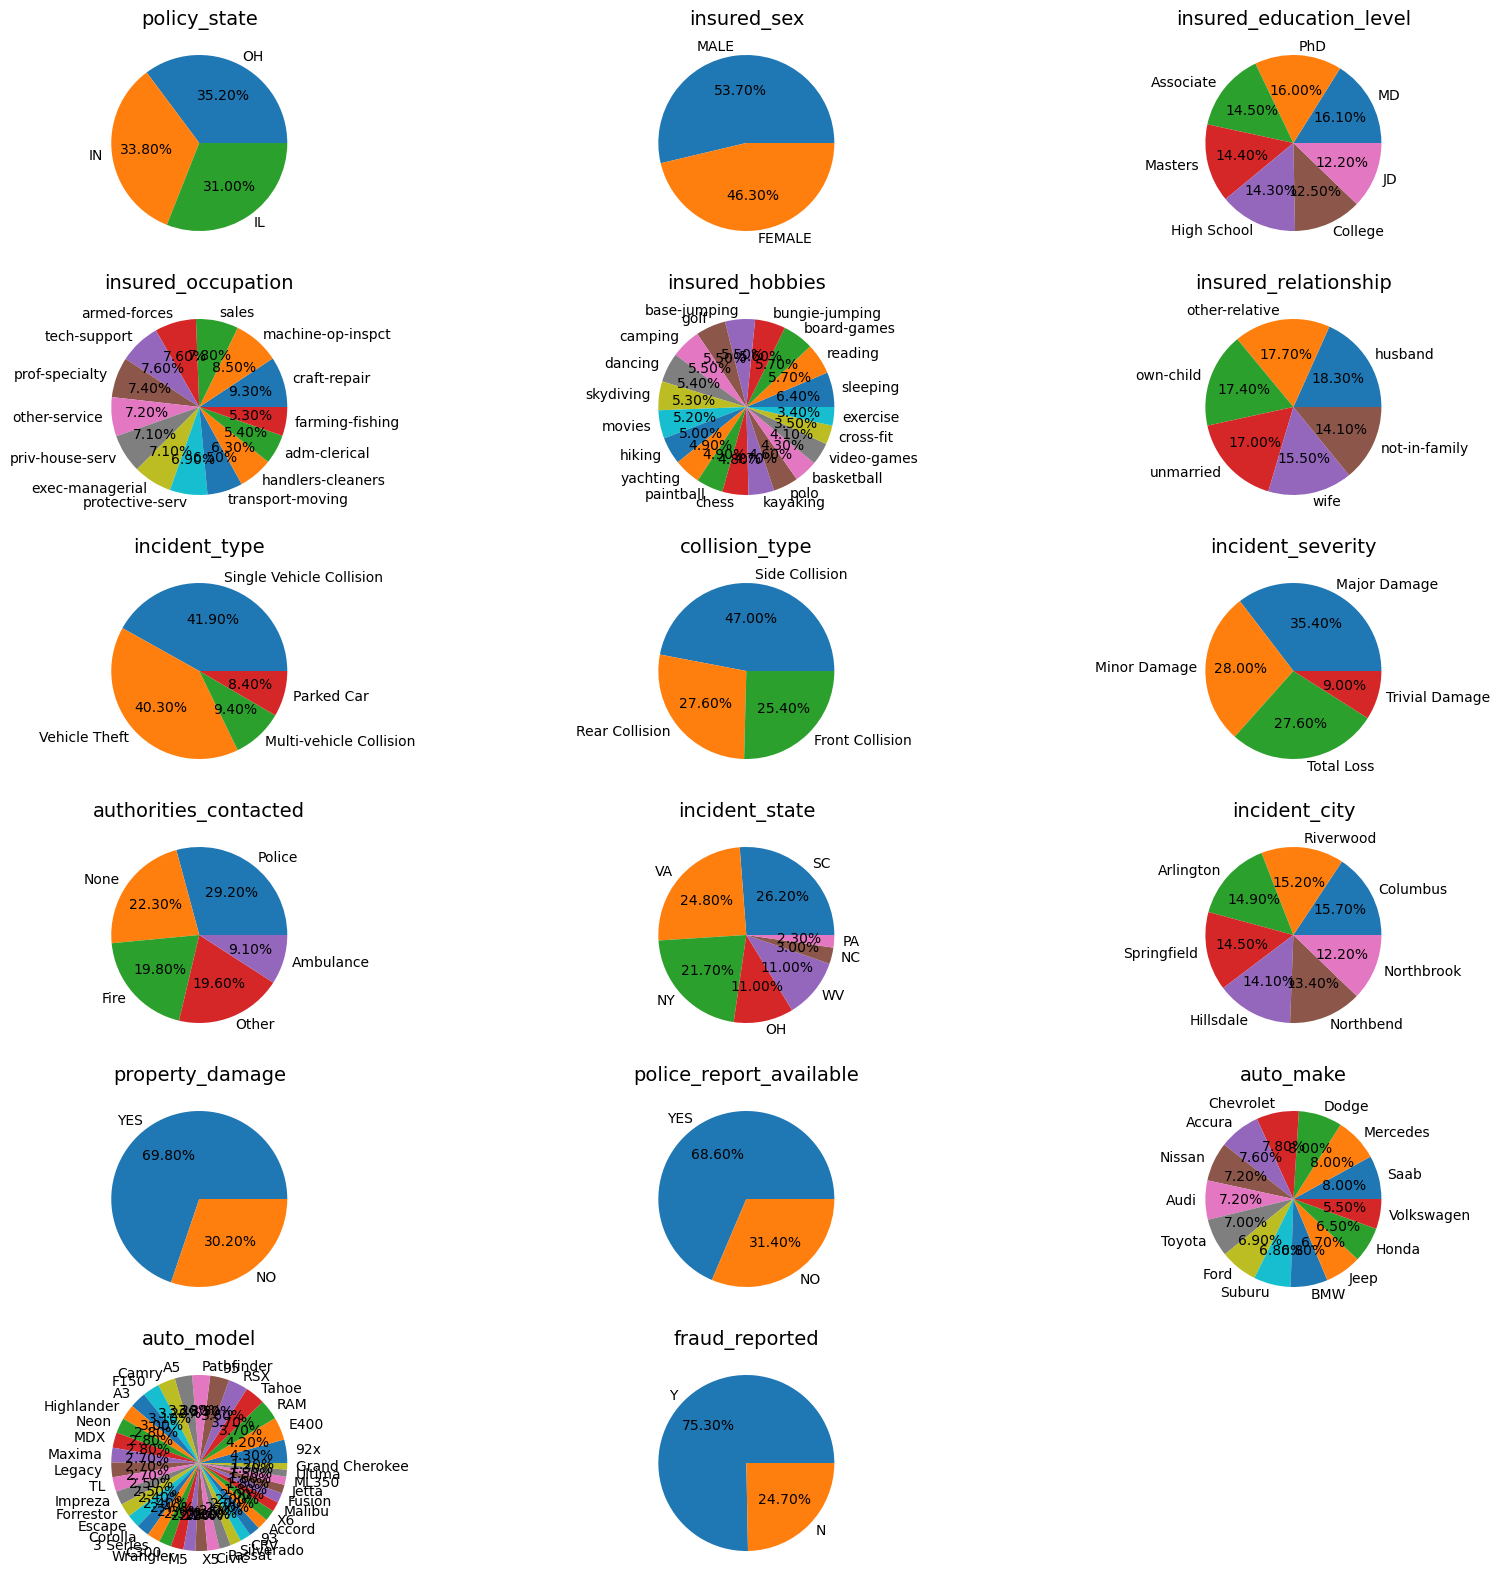

In [46]:
plt.figure(figsize=(20,20))
plot = 1

for i in cat :
    if plot <= 17 :
        ax= plt.subplot(6,3,plot)
        plt.pie(x=df[i].value_counts() , labels=df[i].unique(), autopct='%.2f%%')
        plt.title( i , fontsize=14)
    plot  +=1
plt.show()    

collision_type            Front Collision  Rear Collision  Side Collision
incident_type                                                            
Multi-vehicle Collision               115             152             152
Parked Car                              0              84               0
Single Vehicle Collision              139             140             124
Vehicle Theft                           0              94               0


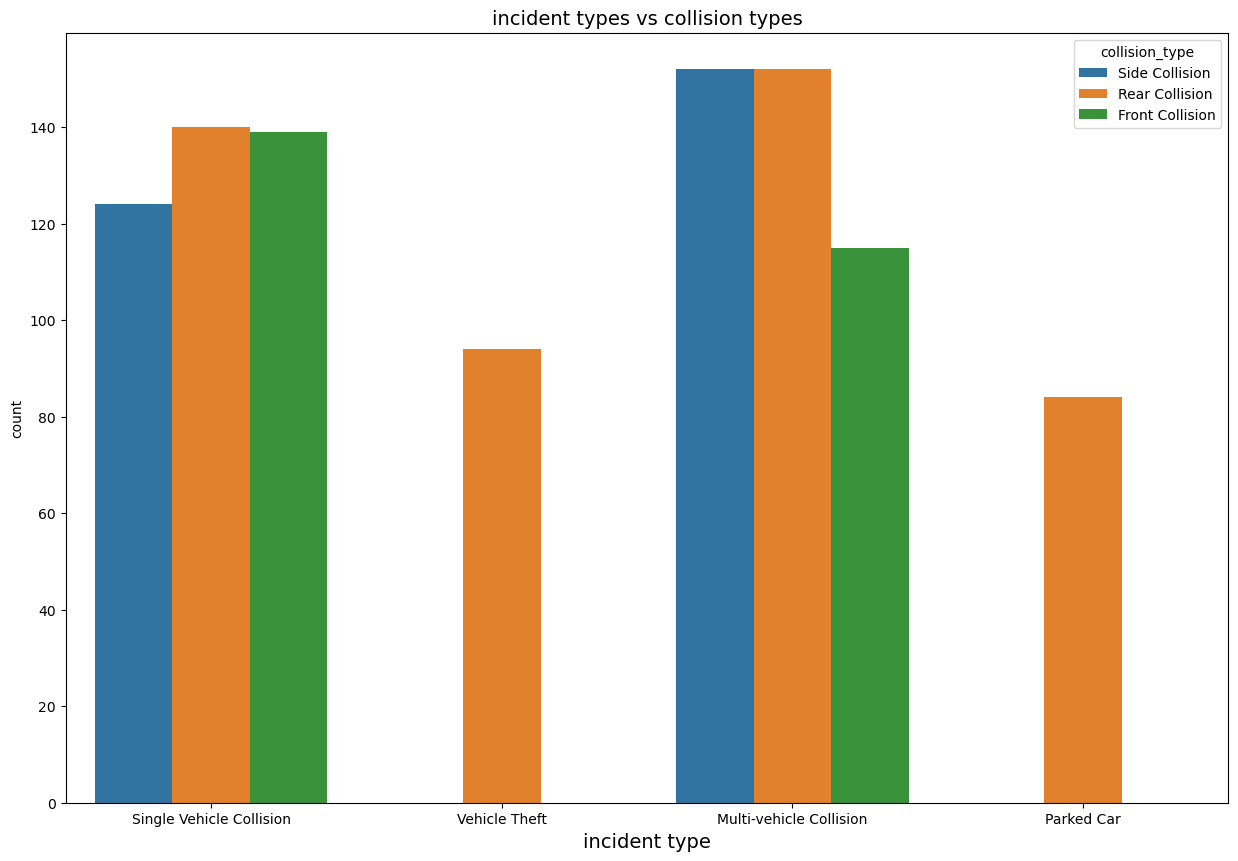

In [47]:
print(pd.crosstab(df['incident_type'], df['collision_type']))
plt.figure(figsize=(15,10))
sns.countplot(x=df['incident_type'] , hue =df['collision_type'])
plt.title('incident types vs collision types',fontsize=14)
plt.xlabel('incident type' , fontsize=14)
plt.show()

- Multi-vehicle Collision has the highest numbers of Rear Collision and Side Collision types
- Parked Car has only one collision type Rear collision which is the least

collision_type     Front Collision  Rear Collision  Side Collision
incident_severity                                                 
Major Damage                    84              96              96
Minor Damage                    81             188              85
Total Loss                      89              96              95
Trivial Damage                   0              90               0


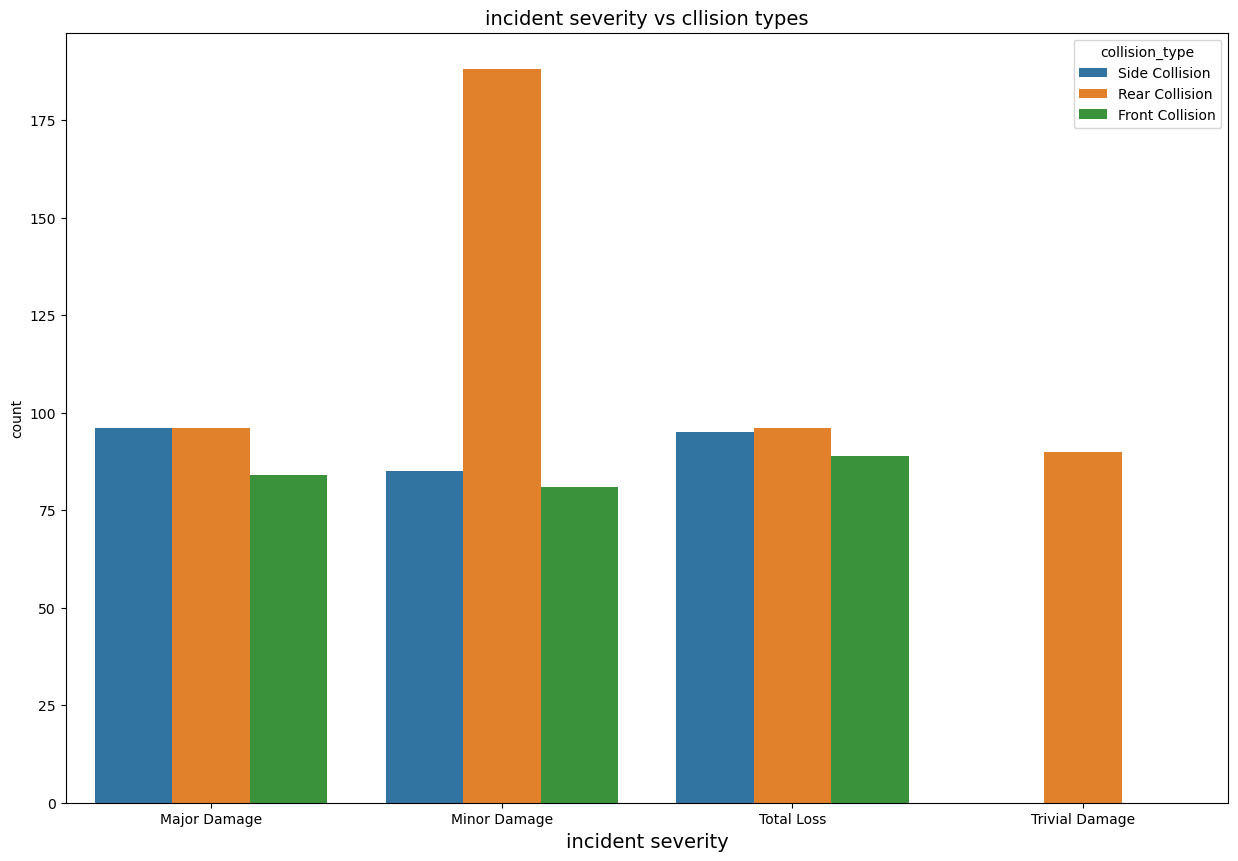

In [48]:
print(pd.crosstab(df['incident_severity'], df['collision_type']))
plt.figure(figsize=(15,10))
sns.countplot(x=df['incident_severity'] , hue =df['collision_type'])
plt.title('incident severity vs cllision types' , fontsize=14)
plt.xlabel('incident severity' , fontsize=14)
plt.show()

- most of rear collison cases causes minor damage
- side collision cause the highest losses in both Total and Major Damage
- Side collision is the most dangerous collision cases

authorities_contacted  Ambulance  Fire  None  Other  Police
collision_type                                             
Front Collision               63    79     0     59      53
Rear Collision                74    74    91     66     165
Side Collision                59    70     0     73      74


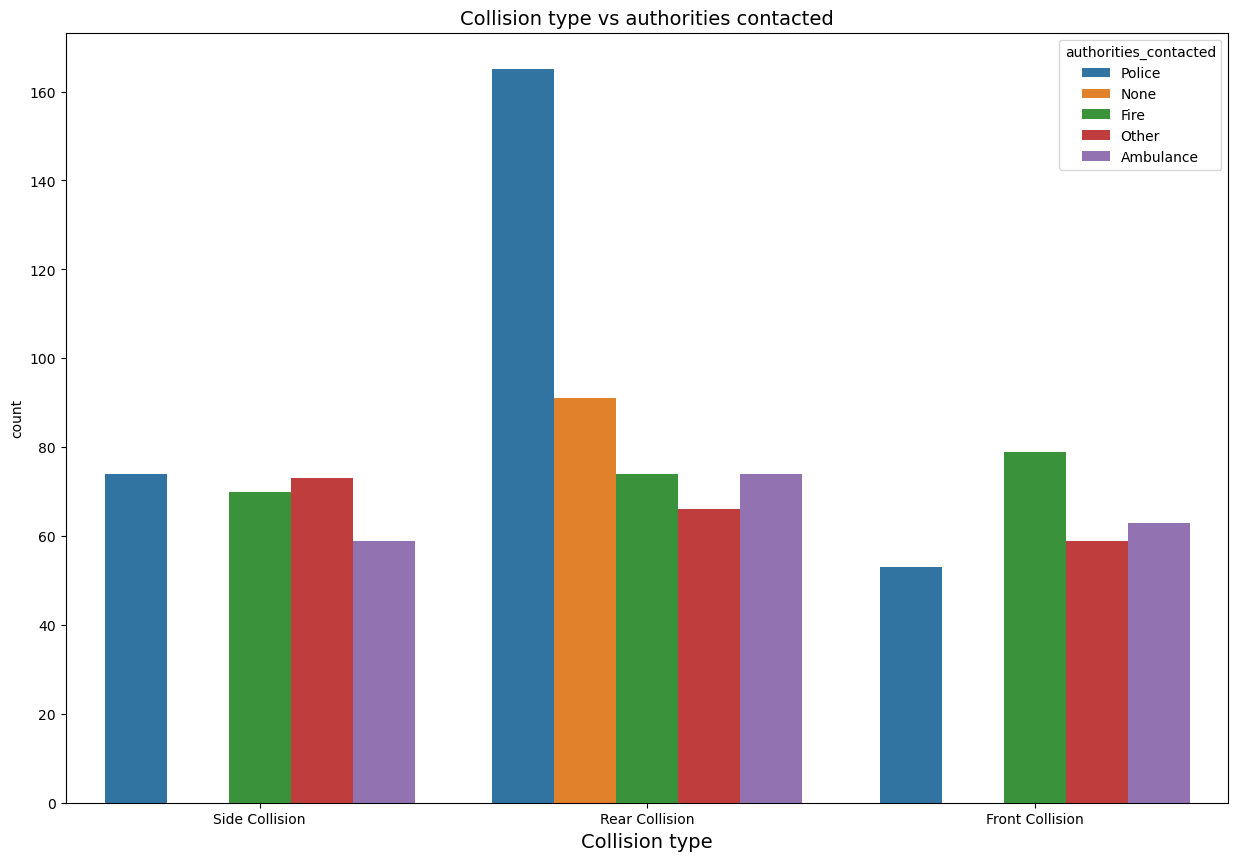

In [49]:
print(pd.crosstab(df['collision_type'] , df['authorities_contacted']))
plt.figure(figsize=(15,10))
sns.countplot(x=df['collision_type'] , hue =df['authorities_contacted'])
plt.title('Collision type vs authorities contacted',fontsize=14)
plt.xlabel('Collision type',fontsize=14)
plt.show()

- police is reported in most f rear collision types
- None reports in Front and side collision cases which refers to high rates of death
- Ambulance is mostly reported in Rear collision cases

property_damage   NO  YES
collision_type           
Front Collision  179   75
Rear Collision   326  144
Side Collision   193   83


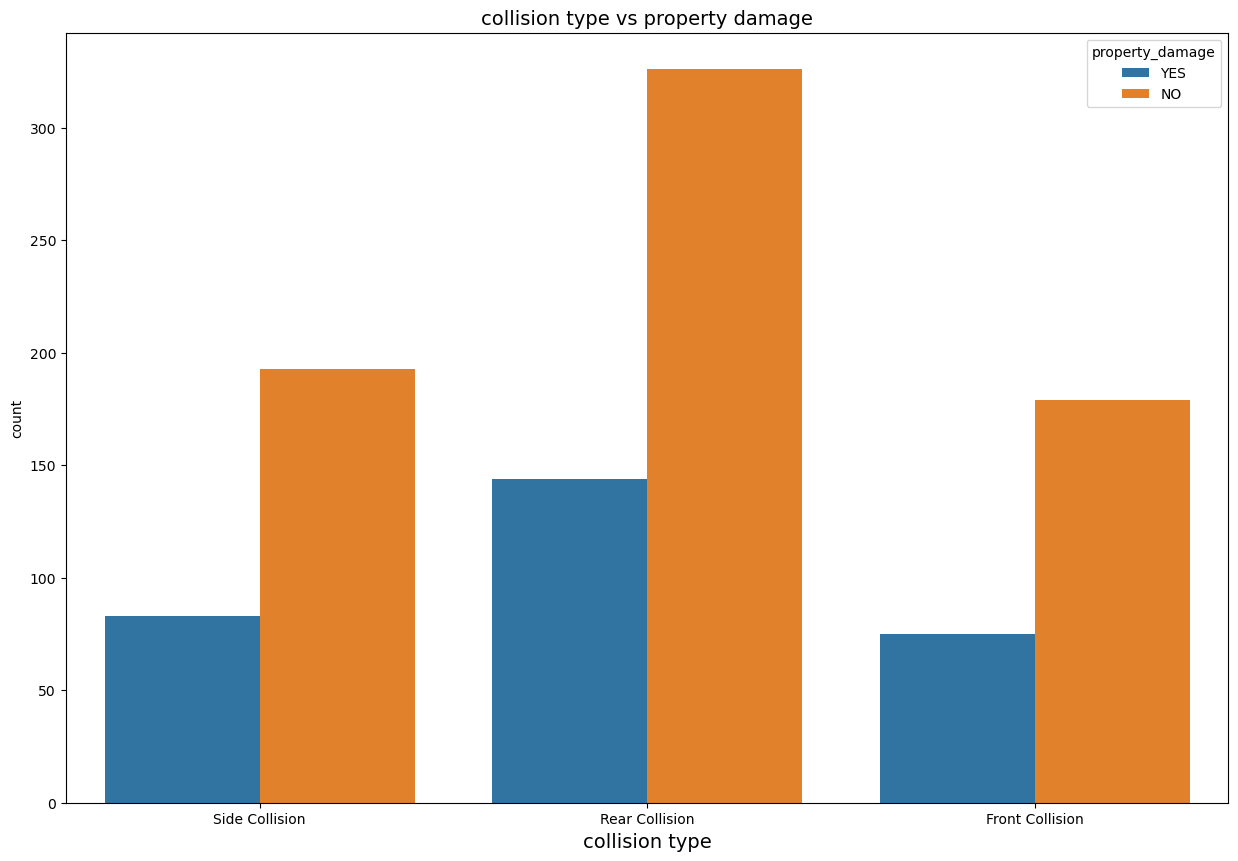

In [50]:
print(pd.crosstab(df['collision_type'] , df['property_damage']))
plt.figure(figsize=(15,10))
sns.countplot(x=df['collision_type'] , hue =df['property_damage'])
plt.title('collision type vs property damage' , fontsize=14)
plt.xlabel('collision type',fontsize=14)

plt.show()

- property Damages are high in rear collision and the least in Front collision

sns.scatterplot(x=df['policy_annual_premium'] , y=df['total_claim_amount'] , hue=df['fraud_reported'])
plt.title('Relation between policy_annual_premium and total_claim_amount')
plt.xlabel('policy_annual_premium')
plt.ylabel('total_claim_amount')
plt.show()

- The amount of Regular Premium payable by the Policyholder in range 1000 and 1600 has total claim amount between 40000 and 80000 in most of non reported fraud cases

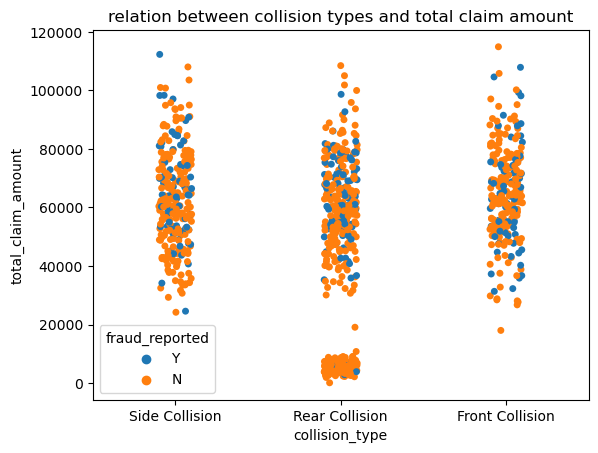

In [51]:
sns.stripplot(x=df['collision_type'] , y=df['total_claim_amount'],hue=df['fraud_reported'])
plt.title('relation between collision types and total claim amount')
plt.show()

- most of collision types are not reported for fraud cases
- most of claim amounts are in range 40000 to 80000 for all collision types
- Frnt collision has the highest vlaim amunt over 100000
- reae collision has the least claim amount between 0 & 20000

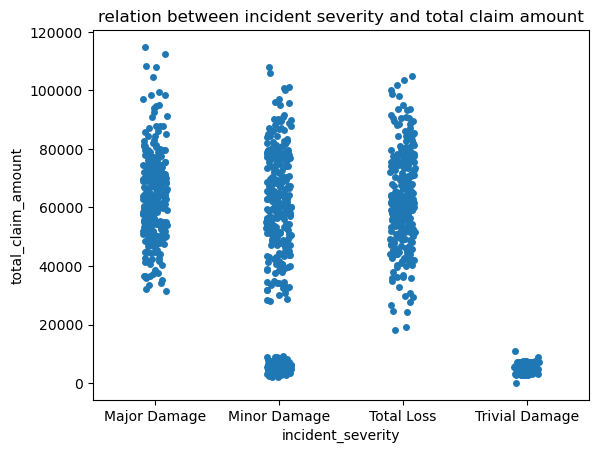

In [52]:
sns.stripplot(x=df['incident_severity'] , y=df['total_claim_amount'])
plt.title('relation between incident severity and total claim amount')
plt.show()

- Major Damage has the highest claim amounts 
- Minor and Trivial Damage cases have the least claim amount below 20000
- most of amount claim for all cases of severity have claim amounts in range between 40000 to 80000

# Checking outliers

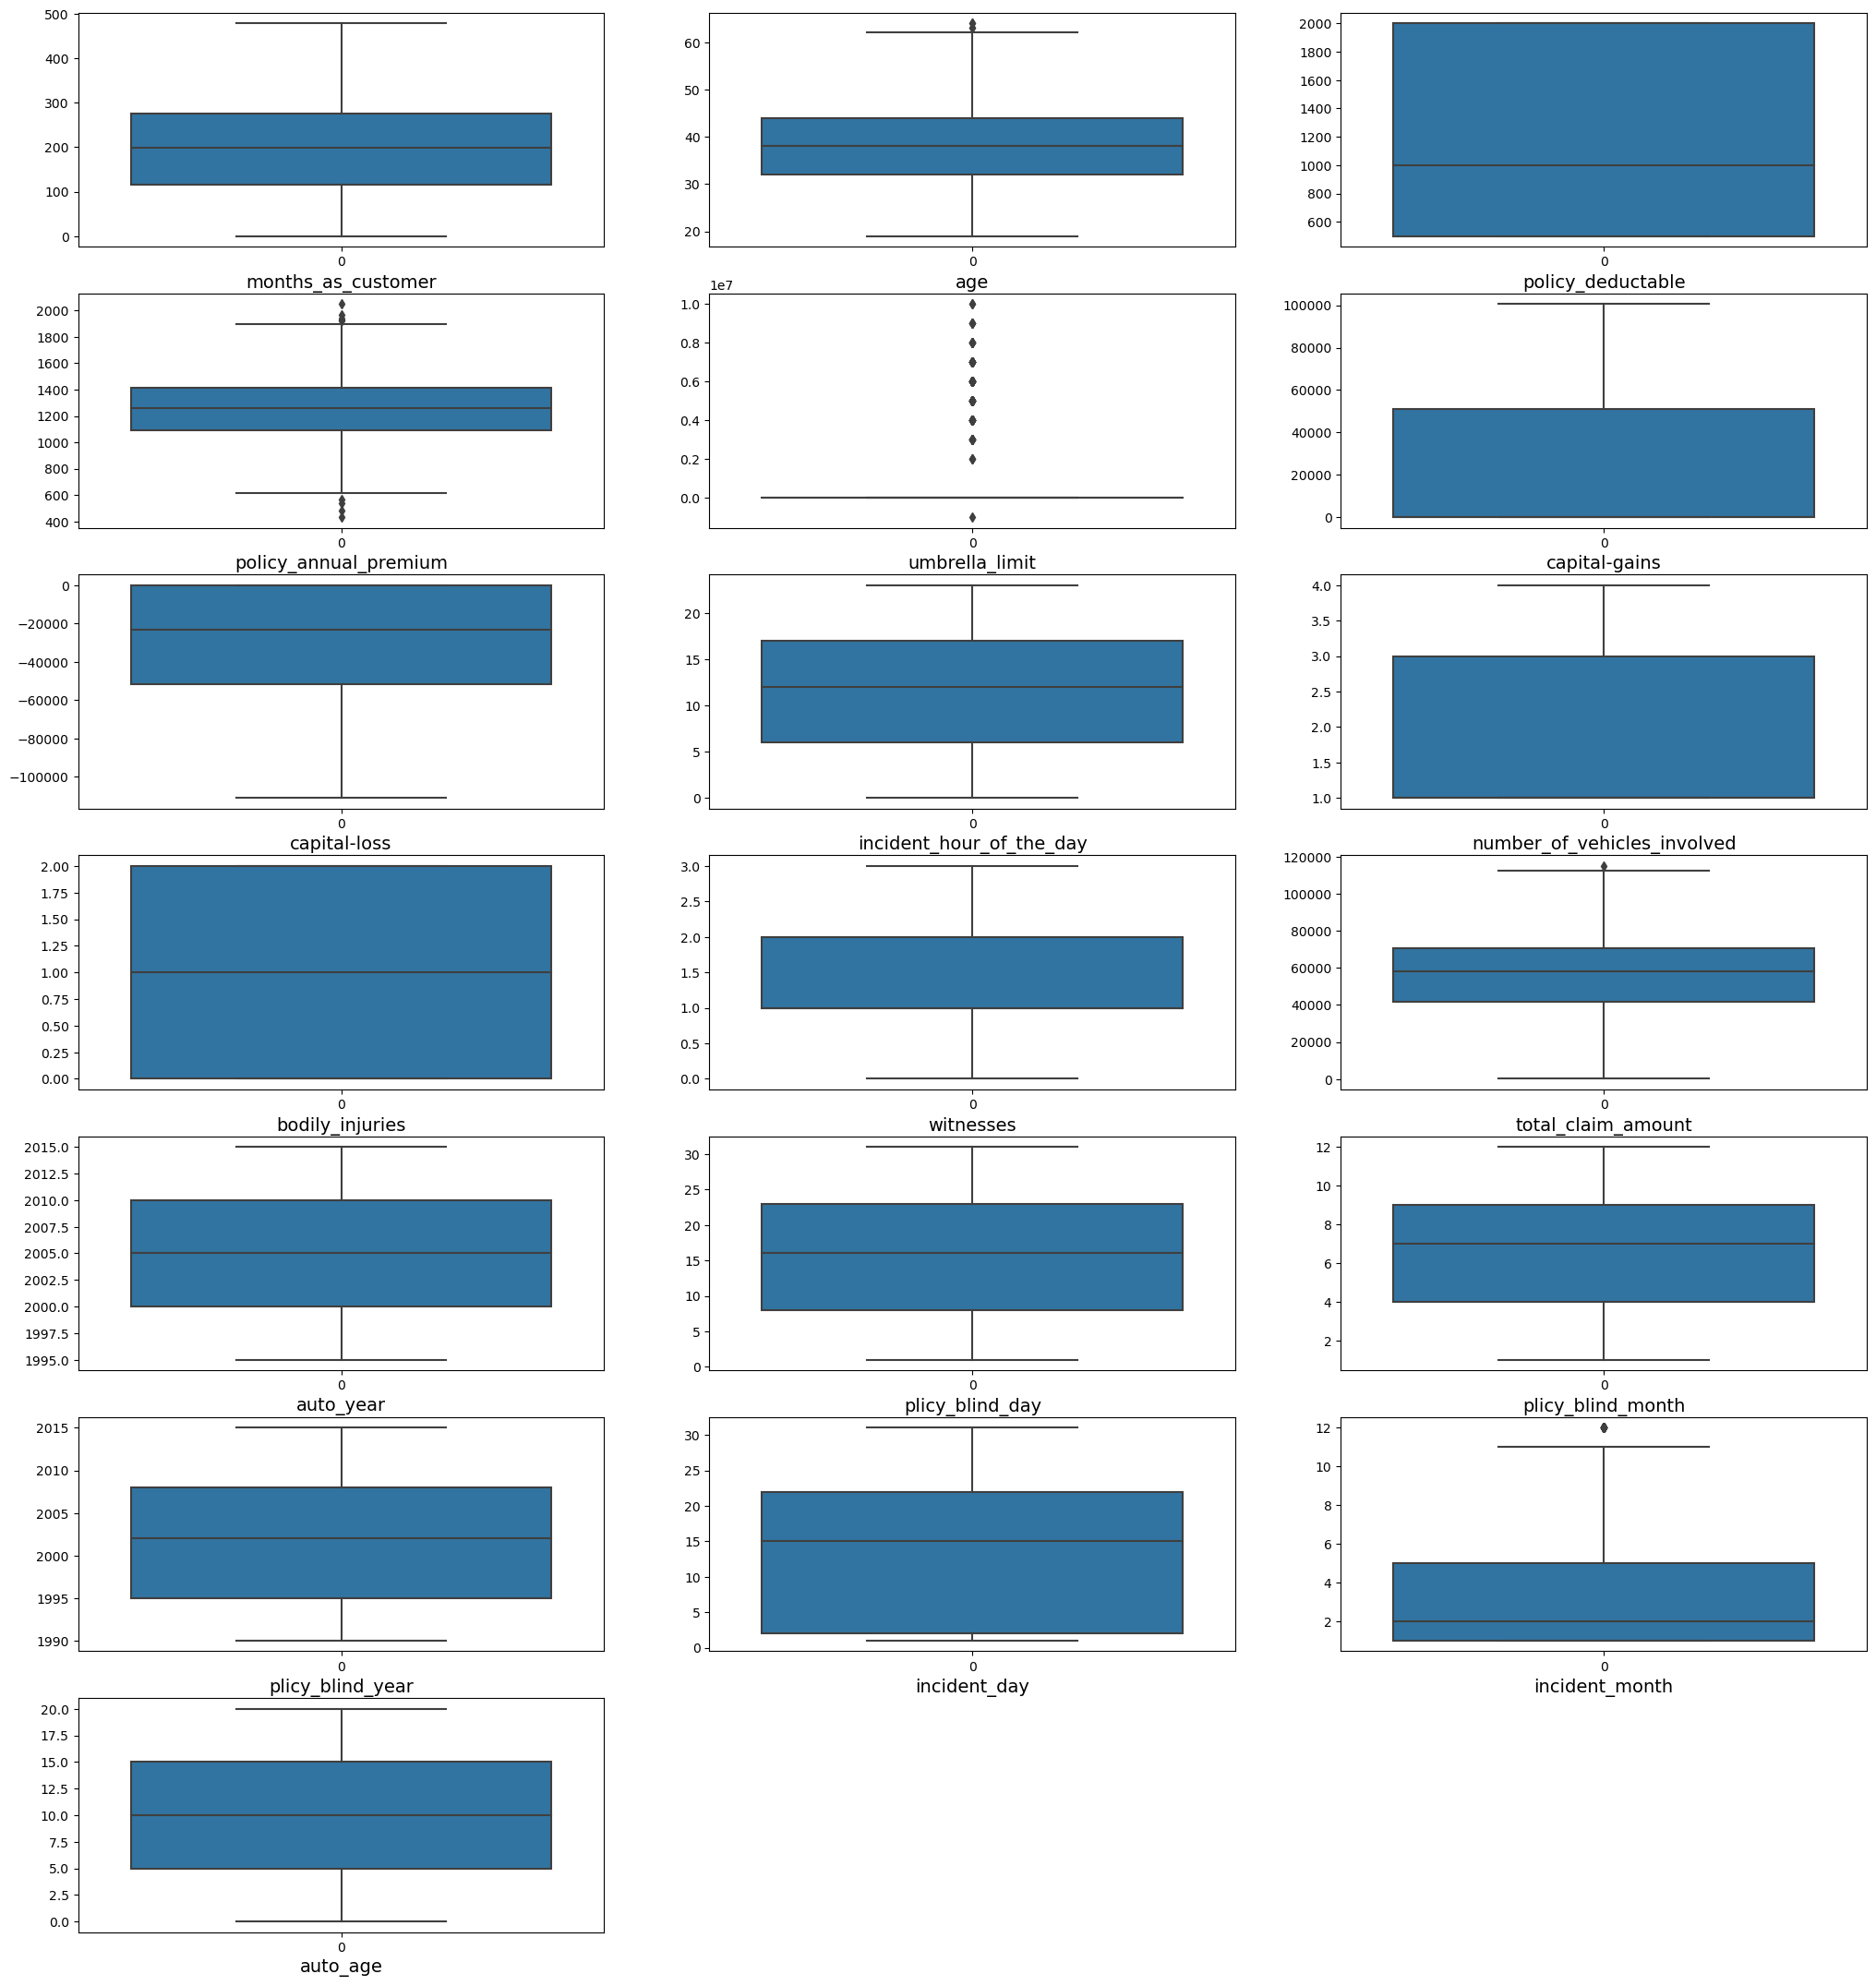

In [53]:
plt.figure(figsize=(25,27))
plot=1
for i in num :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.boxplot(df[i])
        plt.xlabel(i , fontsize=14)
    plot +=1
plt.show()    

- all columns with discrete numerical data look normally distributed
- columns with continuous numerical data policy_annual_premium ,total_claim_amount hve outliers so we will delete them

In [54]:
from scipy.stats import zscore

In [55]:
outliers = df[['policy_annual_premium','total_claim_amount']]
z = np.abs(zscore(outliers))

In [56]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(997, 36)

In [57]:
print('percentage of loss is ',((df.shape[0]-df1.shape[0])/df.shape[0])*100,' %')

percentage of loss is  0.3  %


In [58]:
#use IQR method
out = df[['policy_annual_premium','total_claim_amount']]
q1 = out.quantile(0.25)
q3 = out.quantile(0.75)
IQR = q3 - q1
df2 = df[~((df <(q1 - 1.5*IQR))|(df >(q3 + 1.5*IQR))).any(axis=1)]
df2.shape

(990, 36)

In [59]:
print('percentage of loss is ',((df.shape[0]-df2.shape[0])/df.shape[0])*100,' %')

percentage of loss is  1.0  %


IQR is the best method

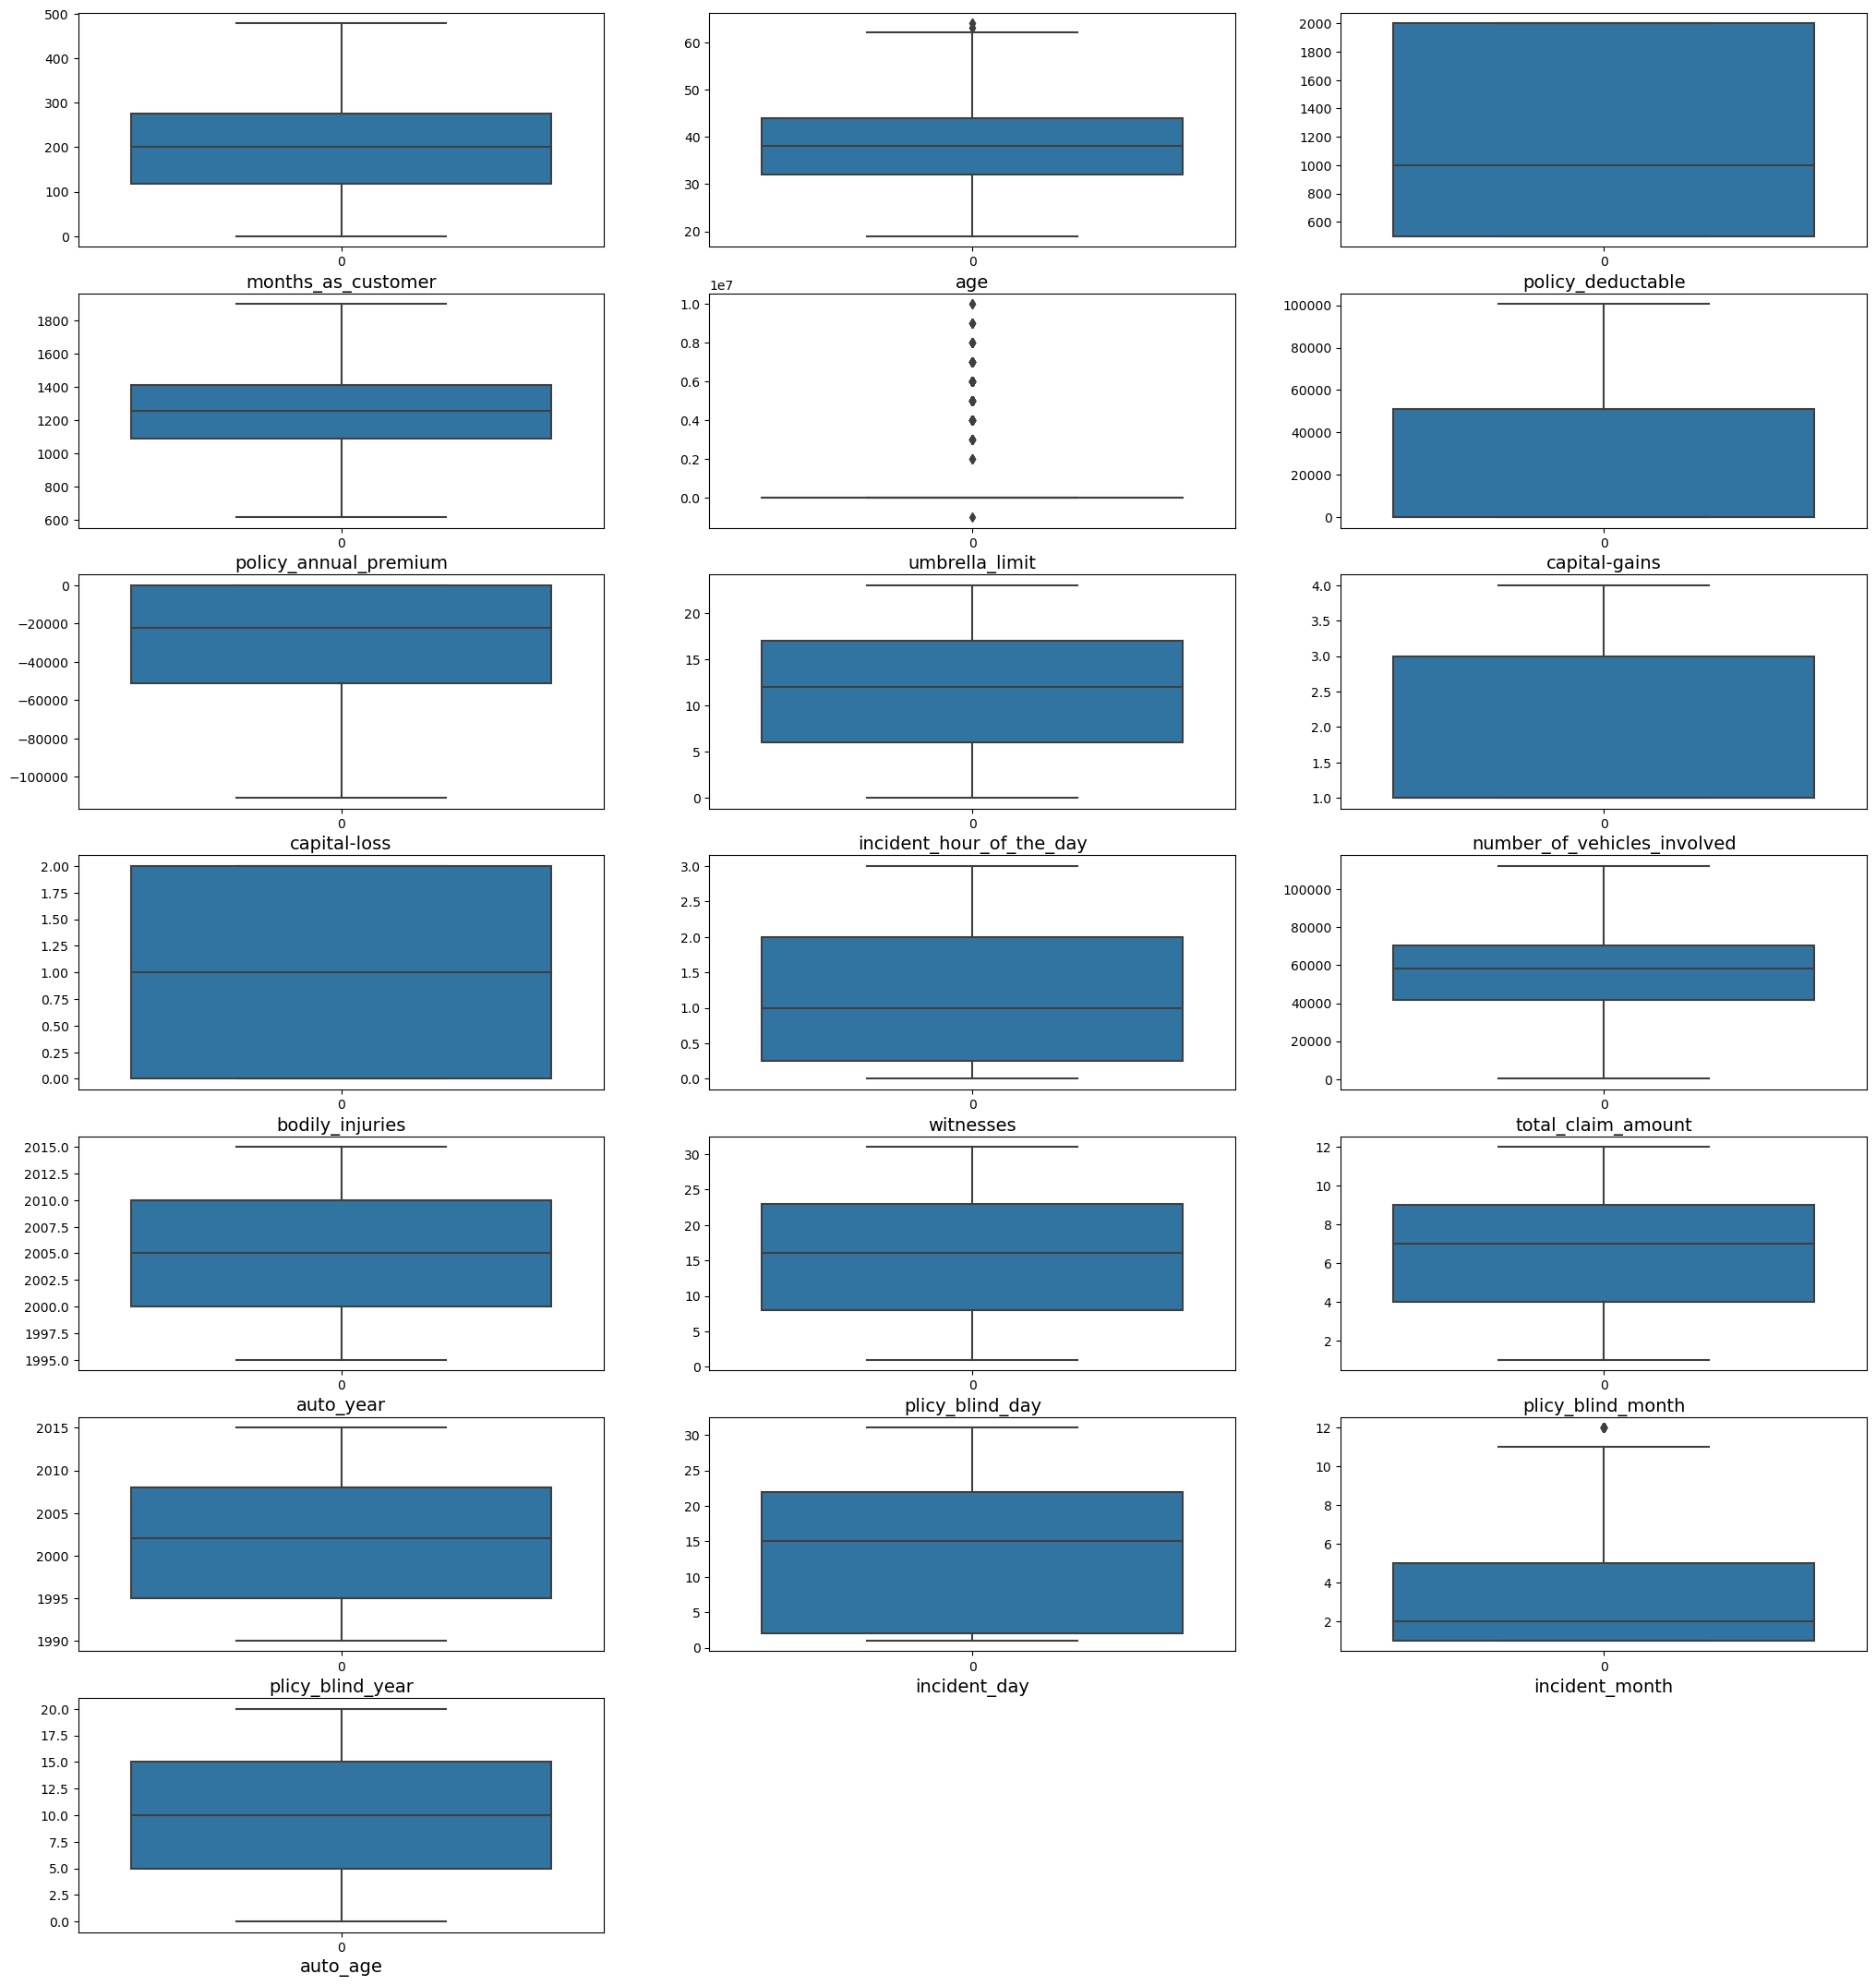

In [60]:
plt.figure(figsize=(25,27))
plot=1
for i in num :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.boxplot(df2[i])
        plt.xlabel(i , fontsize=14)
    plot +=1
plt.show()    

we removed outliers and our data look good

# skew

In [61]:
df2.skew()

months_as_customer             0.356948
age                            0.468977
policy_deductable              0.473187
policy_annual_premium          0.006066
umbrella_limit                 1.806139
capital-gains                  0.472755
capital-loss                  -0.396771
incident_hour_of_the_day      -0.038847
number_of_vehicles_involved    0.499063
bodily_injuries                0.011184
witnesses                      0.023064
total_claim_amount            -0.607020
auto_year                     -0.051191
plicy_blind_day                0.022667
plicy_blind_month             -0.033576
plicy_blind_year               0.052022
incident_day                   0.060009
incident_month                 1.380194
auto_age                       0.051191
dtype: float64

- columns with continuous numerical data total_claim_amount is skewed to we have to remove it
- no need t remove skewness of columns with discrete data

In [62]:
from sklearn.preprocessing import power_transform

In [63]:
df2[['total_claim_amount']] = power_transform(df2[['total_claim_amount']] , method='yeo-johnson')

In [64]:
df2.skew()

months_as_customer             0.356948
age                            0.468977
policy_deductable              0.473187
policy_annual_premium          0.006066
umbrella_limit                 1.806139
capital-gains                  0.472755
capital-loss                  -0.396771
incident_hour_of_the_day      -0.038847
number_of_vehicles_involved    0.499063
bodily_injuries                0.011184
witnesses                      0.023064
total_claim_amount            -0.516023
auto_year                     -0.051191
plicy_blind_day                0.022667
plicy_blind_month             -0.033576
plicy_blind_year               0.052022
incident_day                   0.060009
incident_month                 1.380194
auto_age                       0.051191
dtype: float64

skewness is in the permissible range +0.55/-0.55 for continuous data

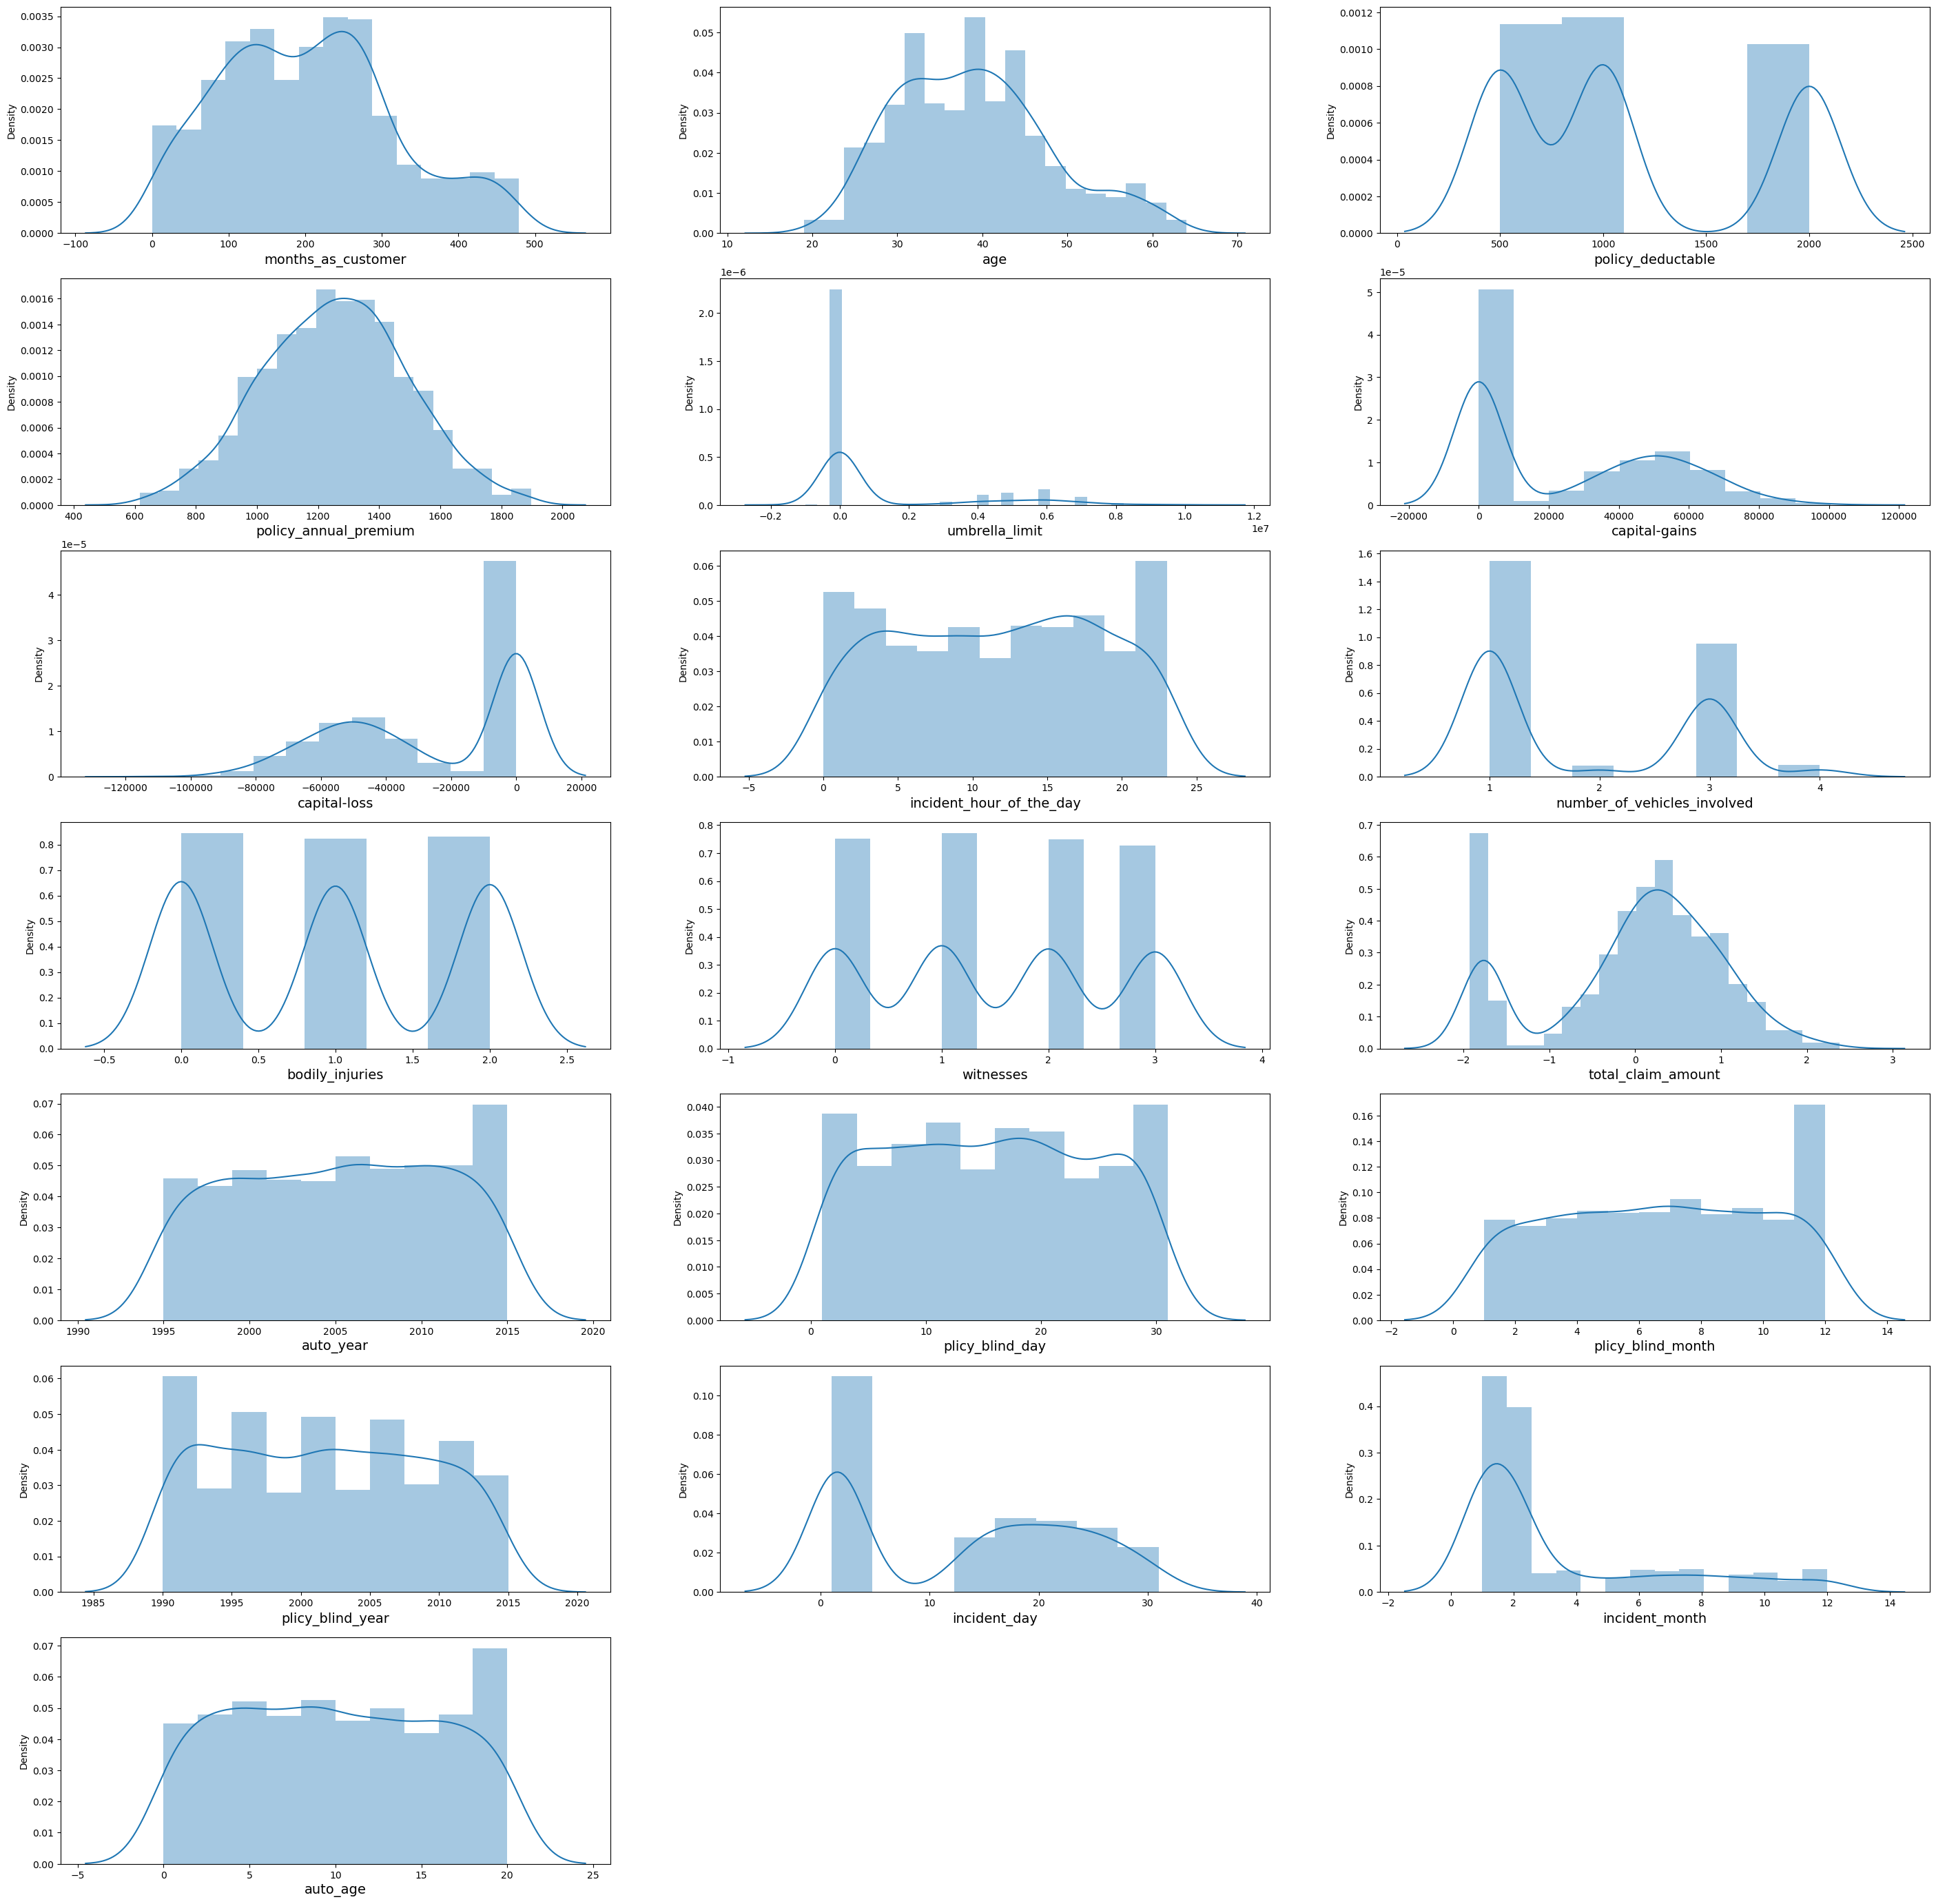

In [65]:
#now recheck distribution
plt.figure(figsize=(35,35))
plot=1
for i in num :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.distplot(df2[i])
        plt.xlabel(i , fontsize=14)
    plot +=1
plt.show()    

Data is normally distributed and ready to be processed

# Correlation

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
df2['fraud_reported'].value_counts()

N    746
Y    244
Name: fraud_reported, dtype: int64

In [68]:
#cnvert categorical columns to numerical
for i in cat :
    df2[i] = le.fit_transform(df2[i])

In [69]:
df2['fraud_reported'].value_counts()

0    746
1    244
Name: fraud_reported, dtype: int64

In [70]:
df2.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_make,auto_model,auto_year,fraud_reported,plicy_blind_day,plicy_blind_month,plicy_blind_year,incident_day,incident_month,auto_age
months_as_customer,1.000000,0.922644,-0.009077,0.024392,-0.004226,0.013978,0.058670,-0.003022,0.010063,-0.094109,...,0.051509,0.011005,0.001807,0.016206,0.047564,0.006013,-0.044627,-0.008169,0.019602,-0.001807
age,0.922644,1.000000,-0.020311,0.024853,0.004619,0.014913,0.072404,0.002179,0.020156,-0.083922,...,0.035015,0.023291,0.002173,0.009536,0.049500,0.018194,-0.032157,-0.005589,0.020064,-0.002173
policy_state,-0.009077,-0.020311,1.000000,0.009259,0.020819,-0.028949,-0.019225,-0.035815,-0.033985,-0.038527,...,0.016162,-0.021703,0.001049,0.027689,-0.001336,0.070729,-0.006025,0.015305,0.021318,-0.001049
policy_deductable,0.024392,0.024853,0.009259,1.000000,0.004684,0.008209,-0.010882,0.021276,-0.042619,0.007016,...,-0.032168,-0.000061,0.021824,0.020529,0.007769,-0.053358,-0.049244,-0.020400,-0.001821,-0.021824
policy_annual_premium,-0.004226,0.004619,0.020819,0.004684,1.000000,-0.004343,0.043702,-0.026858,0.030005,-0.024104,...,0.013083,-0.042851,-0.024554,-0.019974,-0.032992,-0.021850,0.005089,0.016132,0.014573,0.024554
umbrella_limit,0.013978,0.014913,-0.028949,0.008209,-0.004343,1.000000,0.005907,-0.017171,0.026083,-0.036929,...,-0.005346,0.043157,0.006365,0.057932,-0.042975,0.009745,0.052597,-0.021873,0.040924,-0.006365
insured_sex,0.058670,0.072404,-0.019225,-0.010882,0.043702,0.005907,1.000000,0.008478,-0.005657,-0.019900,...,0.024745,-0.013712,-0.030398,0.027603,0.048535,-0.008524,-0.028831,-0.006436,0.025073,0.030398
insured_education_level,-0.003022,0.002179,-0.035815,0.021276,-0.026858,-0.017171,0.008478,1.000000,-0.027565,0.021335,...,0.056427,0.051369,0.049714,0.008565,0.015001,-0.005763,0.017235,-0.051451,0.067800,-0.049714
insured_occupation,0.010063,0.020156,-0.033985,-0.042619,0.030005,0.026083,-0.005657,-0.027565,1.000000,-0.011785,...,0.043476,0.020118,0.000669,0.003391,-0.002691,0.025762,-0.028956,-0.019045,0.016057,-0.000669
insured_hobbies,-0.094109,-0.083922,-0.038527,0.007016,-0.024104,-0.036929,-0.019900,0.021335,-0.011785,1.000000,...,0.001636,0.033043,-0.012209,-0.050338,0.030857,-0.001317,-0.009492,0.012603,0.000305,0.012209


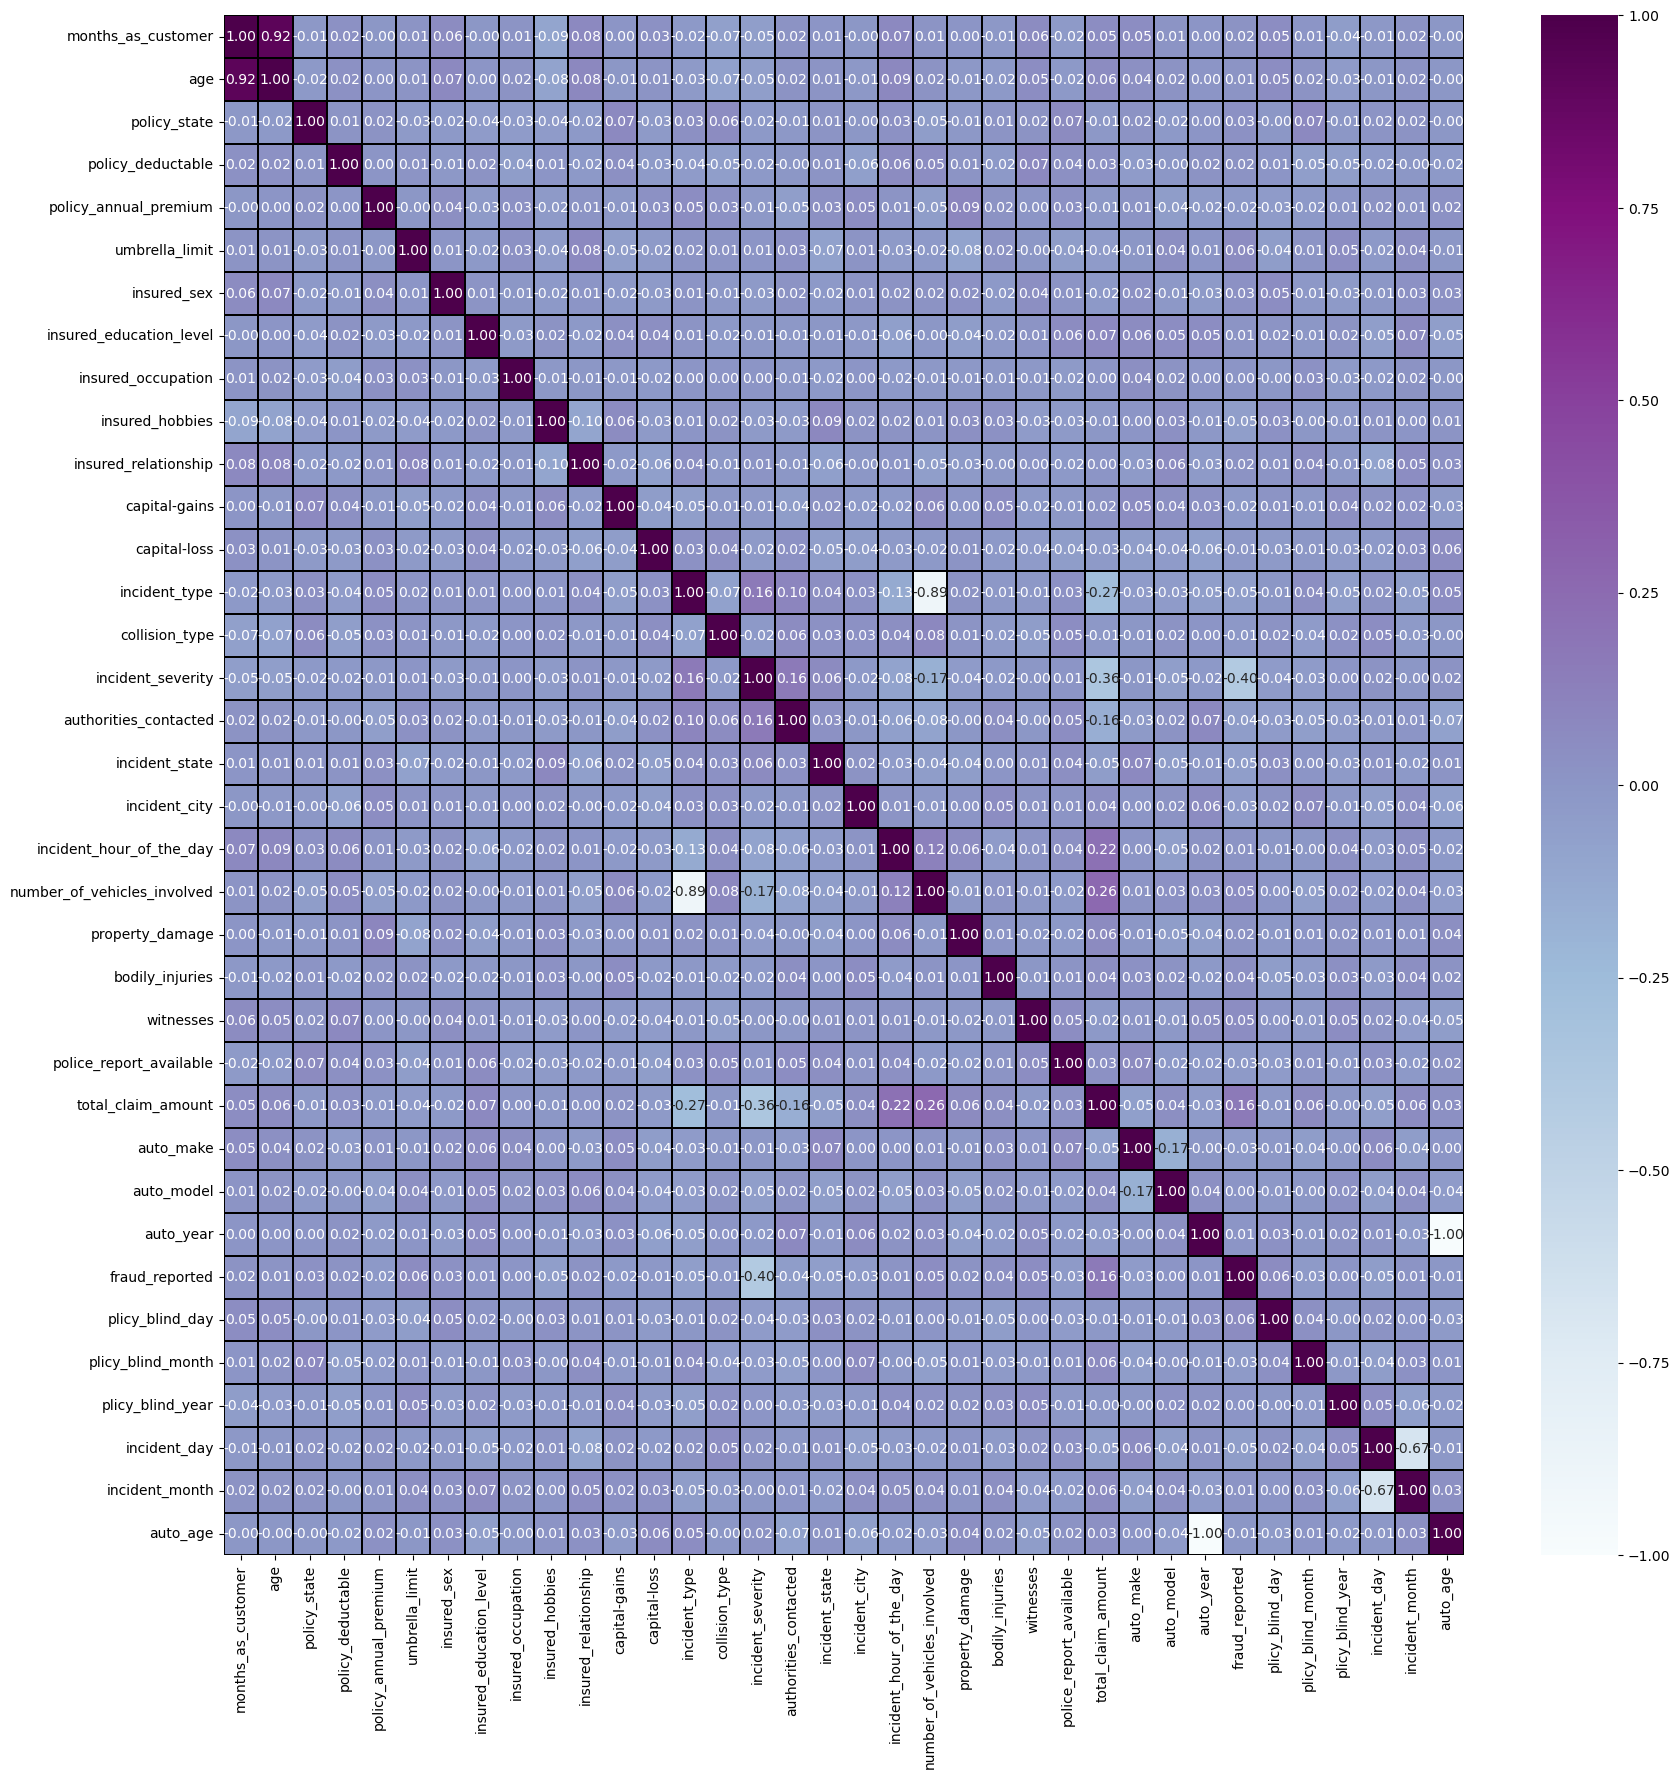

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),cmap='BuPu',linewidth=0.1,linecolor='black',fmt='0.2f',annot=True)
plt.show()

- features incident type and number_of_vehicles_involved are highly positively correlated
- features aut_age , auto_year are making multicollinearity so we will drop one of them
- incident_day , incident_month are highly positively correlated
- variable fraud_reported is correlated with feature incident_severity in 0.4 and poorly correlated with other features

In [72]:
df2.drop('auto_year',axis=1 , inplace=True)

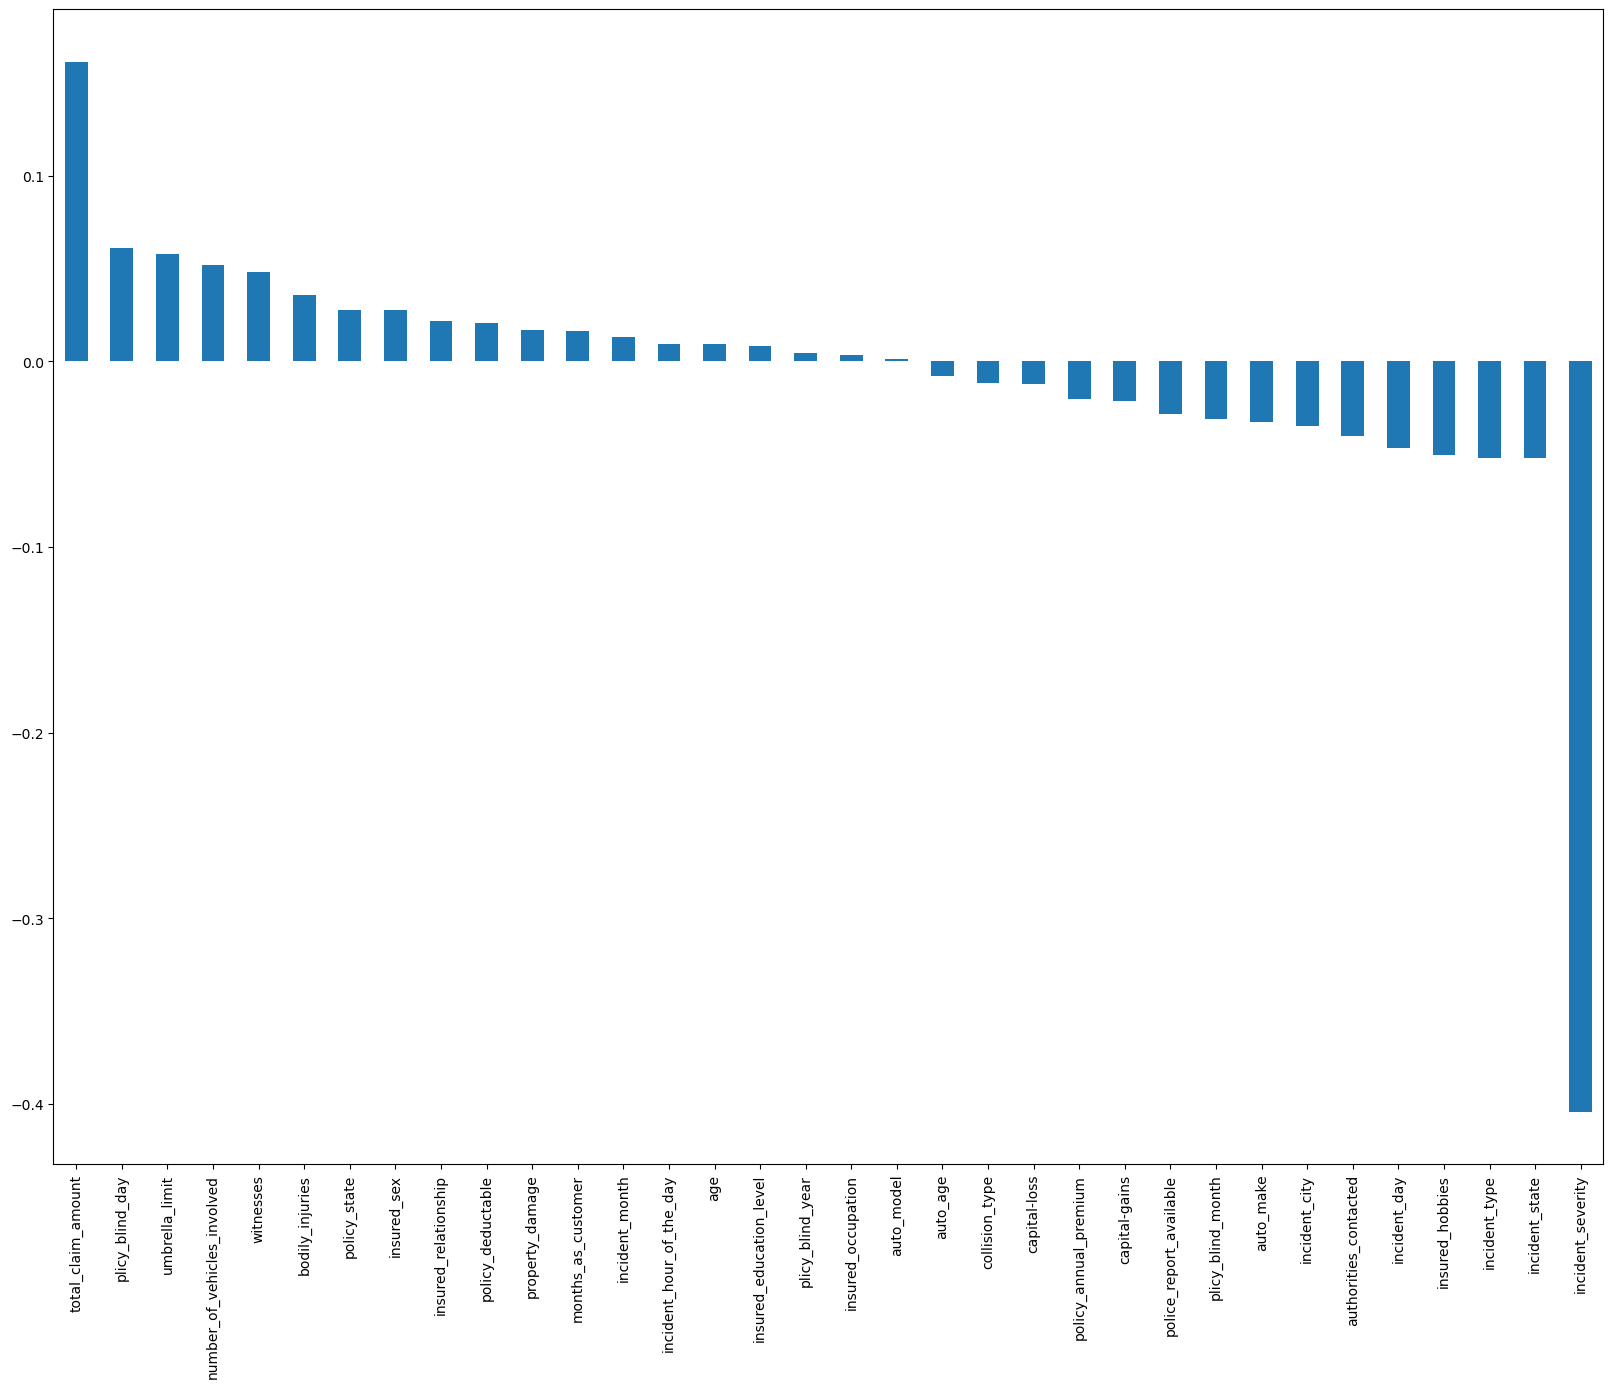

In [73]:
plt.figure(figsize=(20,15))
df2.corr()['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot(kind='bar')
plt.show()

# Building Model

In [74]:
x = df2.drop('fraud_reported',axis=1)
y = df2['fraud_reported']
print('shae of feature : ',x.shape)
print('shape of variable',y.shape)

shae of feature :  (990, 34)
shape of variable (990,)


# Scaling Data 

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled , columns=x.columns)
x_scaled

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,police_report_available,total_claim_amount,auto_make,auto_model,plicy_blind_day,plicy_blind_month,plicy_blind_year,incident_day,incident_month,auto_age
0,1.079106,0.992222,1.183526,-0.225404,0.641488,-0.479469,1.075576,0.532472,-1.160256,1.288864,...,1.477593,0.720654,0.854455,-1.646406,0.174931,1.009629,1.681643,1.139992,-0.735348,0.184303
1,0.206357,0.334065,-0.020678,1.409396,-0.249879,1.693948,1.075576,0.532472,-0.164458,0.936336,...,-0.676777,-1.778548,0.359046,-0.658726,1.306100,-0.169761,0.595296,0.757062,-0.735348,-0.315132
2,-0.614027,-1.091943,1.183526,1.409396,0.667971,1.693948,-0.929735,1.559048,1.080290,-1.355096,...,-0.676777,-0.720204,-0.631771,0.957479,-0.730004,-0.169761,-0.219464,0.852794,-0.428953,-0.315132
3,0.450726,0.224372,-1.224882,1.409396,0.679023,2.128631,-0.929735,1.559048,-1.409205,-1.355096,...,-0.676777,0.393890,-0.879475,1.316635,1.079866,-0.464608,-1.577397,-1.157592,2.022208,-1.480481
4,0.206357,0.553451,-1.224882,-0.225404,1.393893,2.128631,1.075576,-1.520681,1.080290,-1.355096,...,-0.676777,-1.731830,-1.622588,1.047268,-1.069355,-0.169761,1.681643,0.374131,-0.428953,-0.648089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,-1.757329,-0.104707,1.183526,-0.225404,0.232936,-0.479469,-0.929735,1.045760,-1.160256,0.583808,...,-0.676777,1.349243,-0.136362,-1.197460,0.061814,0.125087,-1.441604,0.852794,-0.428953,-0.148653
986,0.703824,0.224372,-1.224882,-0.225404,0.768504,-0.479469,-0.929735,1.559048,0.582391,1.288864,...,-0.676777,2.221733,1.597567,0.777900,-1.634939,-0.464608,1.681643,1.044260,-0.735348,-1.646959
987,-0.648937,-0.543478,1.183526,-1.042805,0.541932,0.824581,-0.929735,1.045760,-1.409205,-1.178832,...,1.477593,0.556674,1.102159,-0.030202,0.174931,-1.349150,0.187916,0.948527,-0.735348,1.516131
988,2.213679,2.527923,-1.224882,1.409396,0.428986,1.693948,1.075576,-1.520681,-0.413407,-1.707624,...,1.477593,-0.249005,-1.374884,-1.287250,0.288048,1.304476,1.274263,1.235725,-0.428953,1.183174


# Check variance inflation factor

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['columns'] = x_scaled.columns
vif

,VIF,columns
0,6.822801,months_as_customer
1,6.837876,age
2,1.035412,policy_state
3,1.034125,policy_deductable
4,1.032235,policy_annual_premium
5,1.036843,umbrella_limit
6,1.027095,insured_sex
7,1.046078,insured_education_level
8,1.015408,insured_occupation
9,1.045840,insured_hobbies


There is no multicollinearity problem

# oversampling

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [80]:
x1 , y1 = sm.fit_resample(x,y)

In [81]:
print('unique values of old variable :\n',y.value_counts())
print('-'*30)
print('unique values of new variable :\n',y1.value_counts())

unique values of old variable :
 0    746
1    244
Name: fraud_reported, dtype: int64
------------------------------
unique values of new variable :
 1    746
0    746
Name: fraud_reported, dtype: int64


# Building model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve


In [83]:
accuracy = []
stats = []
lr = LogisticRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3 ,random_state=i)
    lr.fit(x_train , y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test , y_pred)
    accuracy.append(accu)
    stats.append(i)

In [84]:
best_accuracy = pd.DataFrame()
best_accuracy['accuracy'] = accuracy
best_accuracy['no of states'] = stats
best_accuracy[best_accuracy['accuracy'] == best_accuracy['accuracy'].max()]

,accuracy,no of states
2,0.549107,3
64,0.549107,65


best accuracy is 57.36 % when no of states is 22

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3 ,random_state=22)

In [86]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [87]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}
for name , m in models.items():
    print('model : ',name)
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    train_pred = m.predict(x_train)
    accuracy_test = accuracy_score(y_test , y_pred)
    accuracy_train = accuracy_score(y_train , train_pred)
    print('accuracy of test score = ','{:.2f}'.format(accuracy_test*100),' %')
    print('accuracy of train score = ','{:.2f}'.format(accuracy_train*100),' %')
    print('confusion matrix : \n',confusion_matrix(y_test , y_pred))
    print('classification report : \n',classification_report(y_test , y_pred))
    print('\n')

model :  LogisticRegressin
accuracy of test score =  53.57  %
accuracy of train score =  51.92  %
confusion matrix : 
 [[ 87 148]
 [ 60 153]]
classification report : 
               precision    recall  f1-score   support

           0       0.59      0.37      0.46       235
           1       0.51      0.72      0.60       213

    accuracy                           0.54       448
   macro avg       0.55      0.54      0.53       448
weighted avg       0.55      0.54      0.52       448



model :  RandomForestClassifier
accuracy of test score =  85.04  %
accuracy of train score =  100.00  %
confusion matrix : 
 [[204  31]
 [ 36 177]]
classification report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       235
           1       0.85      0.83      0.84       213

    accuracy                           0.85       448
   macro avg       0.85      0.85      0.85       448
weighted avg       0.85      0.85      0.85       448





ExtraTreesClassifier is the highest accuracy model

# Cross validation score

In [88]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}
for name , m in models.items():
    print('model : ',name)
    score = cross_val_score(m,x1,y1,cv=5)
    mean = score.mean()
    print('score = ',score)
    print('mean score = ',mean)
    print('Difference between accuracy score and mean score = ',accuracy_score(y_test,m.predict(x_test)) - mean)
    print('\n')

model :  LogisticRegressin
score =  [0.53511706 0.47826087 0.4966443  0.5033557  0.53691275]
mean score =  0.5100581356198515
Difference between accuracy score and mean score =  0.025656150094434227


model :  RandomForestClassifier
score =  [0.7458194  0.82274247 0.90939597 0.90939597 0.92281879]
mean score =  0.8620345222329465
Difference between accuracy score and mean score =  -0.011588093661517918


model :  SVC
score =  [0.51839465 0.49498328 0.50671141 0.53691275 0.54362416]
mean score =  0.5201252497138112
Difference between accuracy score and mean score =  -0.044678821142382696


model :  GradientBoostingClassifier
score =  [0.75250836 0.82943144 0.90268456 0.89597315 0.92281879]
mean score =  0.8606832618796435
Difference between accuracy score and mean score =  -0.012468976165357804


model :  BaggingClassifier
score =  [0.77591973 0.81270903 0.88926174 0.89597315 0.90939597]
mean score =  0.8566519270050055
Difference between accuracy score and mean score =  -0.003973355576

 GradientBoostingClassifier model has the least difference of variance between fitted models and it has a good accuracy with balanced data in its matrix

# Hyperparameter

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
params = {'n_estimators':[100,200,300,400],'learning_rate':[0.09,0.1,0.25,0.3],'max_depth':[3,7,10,15]}

In [91]:
rs = RandomizedSearchCV(GradientBoostingClassifier() , params)
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.09, 0.1, 0.25, 0.3],
                                        'max_depth': [3, 7, 10, 15],
                                        'n_estimators': [100, 200, 300, 400]})

In [92]:
rs.best_params_

{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.3}

In [93]:
new_gb = GradientBoostingClassifier(n_estimators= 200, max_depth= 7, learning_rate= 0.3)
new_gb.fit(x_train,y_train)
y_pred = new_gb.predict(x_test)
train_pred = new_gb.predict(x_train)
accuracy_test = accuracy_score(y_test , y_pred)
accuracy_train = accuracy_score(y_train , train_pred)
print('accuracy of test score = ','{:.2f}'.format(accuracy_test*100),' %')
print('accuracy of train score = ','{:.2f}'.format(accuracy_train*100),' %')
print('confusion matrix : \n',confusion_matrix(y_test , y_pred))
print('classification report : \n',classification_report(y_test , y_pred))

accuracy of test score =  87.28  %
accuracy of train score =  100.00  %
confusion matrix : 
 [[203  32]
 [ 25 188]]
classification report : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       235
           1       0.85      0.88      0.87       213

    accuracy                           0.87       448
   macro avg       0.87      0.87      0.87       448
weighted avg       0.87      0.87      0.87       448



se increased accuracy of test model from 84.82 % to 87.28 %

In [94]:
from sklearn.metrics import roc_auc_score , auc

In [96]:
fpr , tpr , thresold = roc_curve(y_test , y_pred)
print('accuracy score of fpr and tpr = ','{:.2f}'.format(roc_auc_score(y_test , y_pred)*100),' %')
print('false positive rate = ',fpr)
print('True positive rate = ',tpr)
print('Thresold = ',thresold)

accuracy score of fpr and tpr =  87.32  %
false positive rate =  [0.         0.13617021 1.        ]
True positive rate =  [0.         0.88262911 1.        ]
Thresold =  [2 1 0]


accuracy score of fpr and tpr =  87.32  %


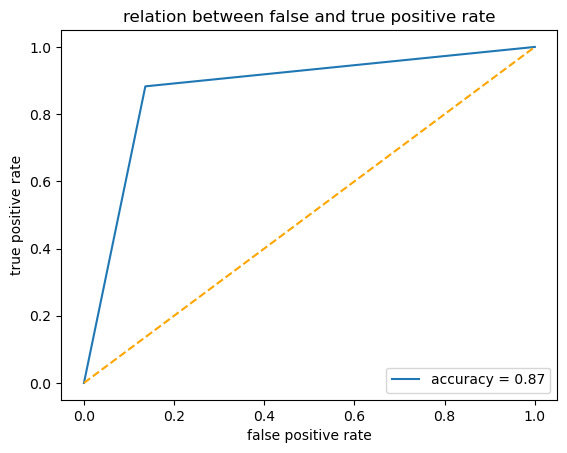

In [100]:
print('accuracy score of fpr and tpr = ','{:.2f}'.format(roc_auc_score(y_test , y_pred)*100),' %')
plt.plot(fpr,tpr , label='accuracy = {:.2f}'.format(roc_auc_score(y_test , y_pred)))
plt.plot([0,1], [0,1] , linestyle='--', color='orange')
plt.title('relation between false and true positive rate')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

# Prediction

In [101]:
prediction = pd.DataFrame()
prediction['actual'] = y_test
prediction['predited'] = y_pred
prediction

,actual,predited
348,0,0
1363,1,1
511,0,0
109,1,1
1015,1,1
...,...,...
1191,1,1
331,0,0
602,0,0
358,1,1


In [102]:
#apply model on data set :
prediction = pd.DataFrame()
prediction['actual'] = df2['fraud_reported']
prediction['predited'] = new_gb.predict(scaler.transform(df2.drop('fraud_reported',axis=1)))
prediction

,actual,predited
0,1,0
1,1,0
2,0,1
3,1,1
4,0,0
...,...,...
995,0,1
996,0,1
997,0,1
998,0,0
